<a href="https://colab.research.google.com/github/gorakhgupta00/ML_Project/blob/main/Bike_Sharing_Demand_Prediction_ML(Regression)_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Seoul Bike Sharing Demand Prediction**

### Project Type - Regression

### Name - Gorakh Gupta

### Contribution - Individual

##**Project Summary**

Bike demand prediction is a common and major problem faced by bike rental companies. Forecasting the  bike counts that can be rented per hour so that its easy to maintain inventory has to be a big challege for them.  In this project, I aimed to develop a regression supervised machine learning model to predict the demand for bikes in a given time period.

The project was carried out using the subsequent steps:

Data Preprocessing: To address missing values, outliers, and any discrepancies in the data, the dataset was cleaned up and preprocessed.



Data Splitting: Using a random state of 0, the preprocessed data was divided into training and test sets. Our predictive model was trained using training data, and its prediction was assessed using testing data.



Model Training: A few hyperparameter variables were used to optimize the models after they were trained on the training set of data.


Model Evaluation: Metrics including mean absolute error, root mean square error, and R-squared were used to assess the performance of the trained models. The model chosen was the one that gave the best results on the test set.


Importance of attributes: Research was done to determine how specific attributes affected the functionality of the model. The results of the analysis demonstrated how important seasonality factors, weather, and temperature are in predicting bike demand.


Model Deployment: To estimate bike demand in real time, a live production setup was used to implement the chosen model. To make sure the model was accurate and useful, its performance was tracked over time.



Models Used
For modeling we tried various regression models such as-

1)Linear Regression

2)Lasso Regression

3)Ridge Regression

4)Random Forest

5)Gradient Boosting

The optimal hyperparameters for each of these models were determined by fine-tuning them using a grid search technique with repeated cross-validation (CV). In order to learn about the features that are really significant, we also learned about feature importance.

##**Github Link:**

https://github.com/AbhishekThakur0126/Bike_Sharing_Demand_Prediction_Regression_ML

## Problem Statement

Presently In several large cities, rental bikes have been implemented to improve mobility comfort. In order to reduce waiting times, it is crucial that the public have access to the rental bikes at the appropriate times. Eventually, maintaining a steady supply of rental bikes for the city becomes a big priority. Predicting the number of bikes needed each hour to maintain a steady supply of rental bikes is an essential component.

## Business Objective

Estimating the ideal quantity of bikes required at any given time of day is a critical and complex commercial problem. Finding the ideal balance is crucial since having too few bikes can result in resource inefficiencies, such as increased maintenance costs and the requirement for infrastructure related to parking and security, while having too many bikes can lead to financial losses. These losses include potential long-term effects like the decline in consumer loyalty and trust as well as immediate revenue reduction brought on by a smaller customer base.

Bicycle sharing companies can better assign bikes and guarantee a sufficient supply of bikes for clients by forecasting their demand.

Therefore, it is essential for bike rental businesses to have a reliable system for estimating demand. With the help of this technique, they may work effectively, make the most use of their resources, and guarantee a flawless customer experience. Precise demand projections are crucial for well-informed decision-making and the overall prosperity of companies that provide bike sharing services.

##Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of the day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
from google.colab import files
upload = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})


In [5]:
#loading data
bike_df = pd.read_csv("/content/SeoulBikeData.csv" , encoding = "unicode_escape")

## Getting to know about data

In [ ]:
#first 15 rows look
bike_df.head(n = 15)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0   01/12/2017                254     0             -5.2           37   
1   01/12/2017                204     1             -5.5           38   
2   01/12/2017                173     2             -6.0           39   
3   01/12/2017                107     3             -6.2           40   
4   01/12/2017                 78     4             -6.0           36   
5   01/12/2017                100     5             -6.4           37   
6   01/12/2017                181     6             -6.6           35   
7   01/12/2017                460     7             -7.4           38   
8   01/12/2017                930     8             -7.6           37   
9   01/12/2017                490     9             -6.5           27   
10  01/12/2017                339    10             -3.5           24   
11  01/12/2017                360    11             -0.5           21   
12  01/12/2017                449    12              1.7           23   
13  01/12/2017                451    13              2.4           25   
14  01/12/2017                447    14              3.0           26   

    Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                2.2              2000                      -17.6   
1                0.8              2000                      -17.6   
2                1.0              2000                      -17.7   
3                0.9              2000                      -17.6   
4                2.3              2000                      -18.6   
5                1.5              2000                      -18.7   
6                1.3              2000                      -19.5   
7                0.9              2000                      -19.3   
8                1.1              2000                      -19.8   
9                0.5              1928                      -22.4   
10               1.2              1996                      -21.2   
11               1.3              1936                      -20.2   
12               1.4              2000                      -17.2   
13               1.6              2000                      -15.6   
14               2.0              2000                      -14.6   

    Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.00           0.0            0.0  Winter  No Holiday   
1                      0.00           0.0            0.0  Winter  No Holiday   
2                      0.00           0.0            0.0  Winter  No Holiday   
3                      0.00           0.0            0.0  Winter  No Holiday   
4                      0.00           0.0            0.0  Winter  No Holiday   
5                      0.00           0.0            0.0  Winter  No Holiday   
6                      0.00           0.0            0.0  Winter  No Holiday   
7                      0.00           0.0            0.0  Winter  No Holiday   
8                      0.01           0.0            0.0  Winter  No Holiday   
9                      0.23           0.0            0.0  Winter  No Holiday   
10                     0.65           0.0            0.0  Winter  No Holiday   
11                     0.94           0.0            0.0  Winter  No Holiday   
12                     1.11           0.0            0.0  Winter  No Holiday   
13                     1.16           0.0            0.0  Winter  No Holiday   
14                     1.01           0.0            0.0  Winter  No Holiday   

   Functioning Day  
0              Yes  
1              Yes  
2              Yes  
3              Yes  
4              Yes  
5              Yes  
6              Yes  
7              Yes  
8              Yes  
9              Yes  
10             Yes  
11             Yes  
12             Yes  
13             Yes  
14             Yes

In [ ]:
#last 15 rows look
bike_df.tail(n = 15)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8745  30/11/2018                809     9             -0.4           57   
8746  30/11/2018                554    10              1.9           51   
8747  30/11/2018                642    11              5.3           43   
8748  30/11/2018                720    12              6.6           35   
8749  30/11/2018                740    13              7.1           24   
8750  30/11/2018                761    14              7.8           20   
8751  30/11/2018                768    15              7.0           20   
8752  30/11/2018                837    16              7.2           23   
8753  30/11/2018               1047    17              6.0           29   
8754  30/11/2018               1384    18              4.7           34   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8745               0.6              1270                       -7.8   
8746               0.8              1029                       -7.1   
8747               1.8              1177                       -6.2   
8748               1.3              1409                       -7.8   
8749               2.8              1838                      -12.1   
8750               2.2              2000                      -13.8   
8751               3.3              1994                      -14.4   
8752               1.5              1945                      -12.6   
8753               2.1              1877                      -10.7   
8754               1.9              1661                       -9.8   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8745                     0.45           0.0            0.0  Autumn   
8746                     1.01           0.0            0.0  Autumn   
8747                     1.38           0.0            0.0  Autumn   
8748                     1.70           0.0            0.0  Autumn   
8749                     1.83           0.0            0.0  Autumn   
8750                     1.67           0.0            0.0  Autumn   
8751                     1.21           0.0            0.0  Autumn   
8752                     0.72           0.0            0.0  Autumn   
8753                     0.23           0.0            0.0  Autumn   
8754                     0.00           0.0            0.0  Autumn   
8755                     0.00           0.0            0.0  Autumn   
8756                     0.00           0.0            0.0  Autumn   
8757                     0.00           0.0            0.0  Autumn   
8758                     0.00           0.0            0.0  Autumn   
8759                     0.00           0.0            0.0  Autumn   

         Holiday Functioning Day  
8745  No Holiday             Yes  
8746  No Holiday             Yes  
8747  No Holiday             Yes  
8748  No Holiday             Yes  
8749  No Holiday             Yes  
8750  No Holiday             Yes  
8751  No Holiday             Yes  
8752  No Holiday             Yes  
8753  No Holiday             Yes  
8754  No Holiday             Yes  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday            

Information regarding the hourly-rented bike from January 12, 2017, to November 30, 2018, is included in the dataset. The state of the weather is another factor considered.

In [6]:
#chcking dimensions of dataset
bike_df.shape

(8760, 14)

Thirteen features, a total of 8760 data points, and one target output—the rented bike count—are present.

In [ ]:
#summary
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

There are both categories and numerical variables. Not a single column contains any null values.We must convert Date to the date datatype since it currently has the object datatype.


## Breaking a date column and Changing data type

In [ ]:
#creating function to change data type of date
def get_date(date_str):
    date_obj = dt.datetime.strptime(date_str, "%d/%m/%Y")
    date_str_formatted = date_obj.strftime("%Y-%m-%d")
    date_obj_formatted = pd.to_datetime(date_str_formatted, format="%Y-%m-%d")
    return date_obj_formatted


In [ ]:
 #applying function
 bike_df["Date"] = bike_df["Date"].apply(get_date)

In [ ]:
# extracting date, month and day of week
bike_df['Day'] = bike_df['Date'].apply(lambda x : x.day)
bike_df['Month'] = bike_df['Date'].apply(lambda x : x.month)
bike_df['Day_of_week'] = bike_df['Date'].dt.day_name()

bike_df= bike_df.drop("Date", axis= 1)

In [ ]:
bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Day  \
0           0.0            0.0  Winter  No Holiday             Yes    1   
1           0.0            0.0  Winter  No Holiday             Yes    1   
2           0.0            0.0  Winter  No Holiday             Yes    1   
3           0.0            0.0  Winter  No Holiday             Yes    1   
4           0.0            0.0  Winter  No Holiday             Yes    1   

   Month Day_of_week  
0     12      Friday  
1     12      Friday  
2     12      Friday  
3     12      Friday  
4     12      Friday

## Checking if there are any duplicates

In [ ]:
# checking for duplicate values
bike_df.duplicated().sum()

0

## Checking if there are any null values

In [ ]:
# checking for missing values
bike_df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Day_of_week                  0
dtype: int64

There are no duplicate as  well as missing values.

##**Exploratory Data Analysis**

### Univariate Analysis

Let's examine the intended variable. The number of rented bikes (DEPENDENT Variable)  

In [ ]:
#numerical column summary
bike_df["Rented Bike Count"].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

Let's see Distribution of Rented Bike Count

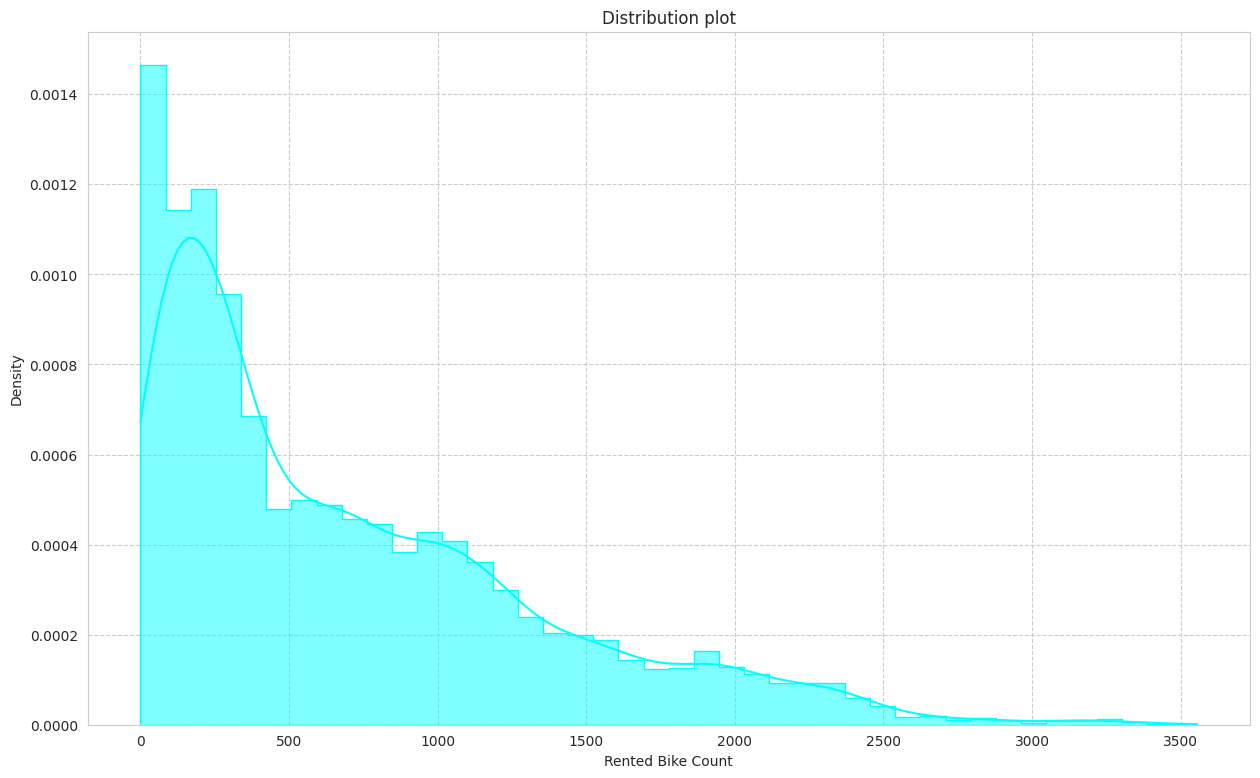

In [7]:
# histplot plot
plt.figure(figsize=(15, 9))
sns.histplot(bike_df["Rented Bike Count"], kde=True, color='cyan', element='step', stat='density', common_norm=False)
plt.title("Distribution plot")
plt.xlabel("Rented Bike Count")
plt.ylabel("Density")
plt.show()


In [ ]:
#checking skewness score
bike_df["Rented Bike Count"].skew()

1.1534281773679014

Rented Bike Count is positively skewed and its skewness score is greater than +1 , so we need to apply transformaion technique to reduce its skewness.

Some methods to remove skewness are :

*square-root for moderate skew:* sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

*log for greater skew:*log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

*inverse for severe skew:* 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

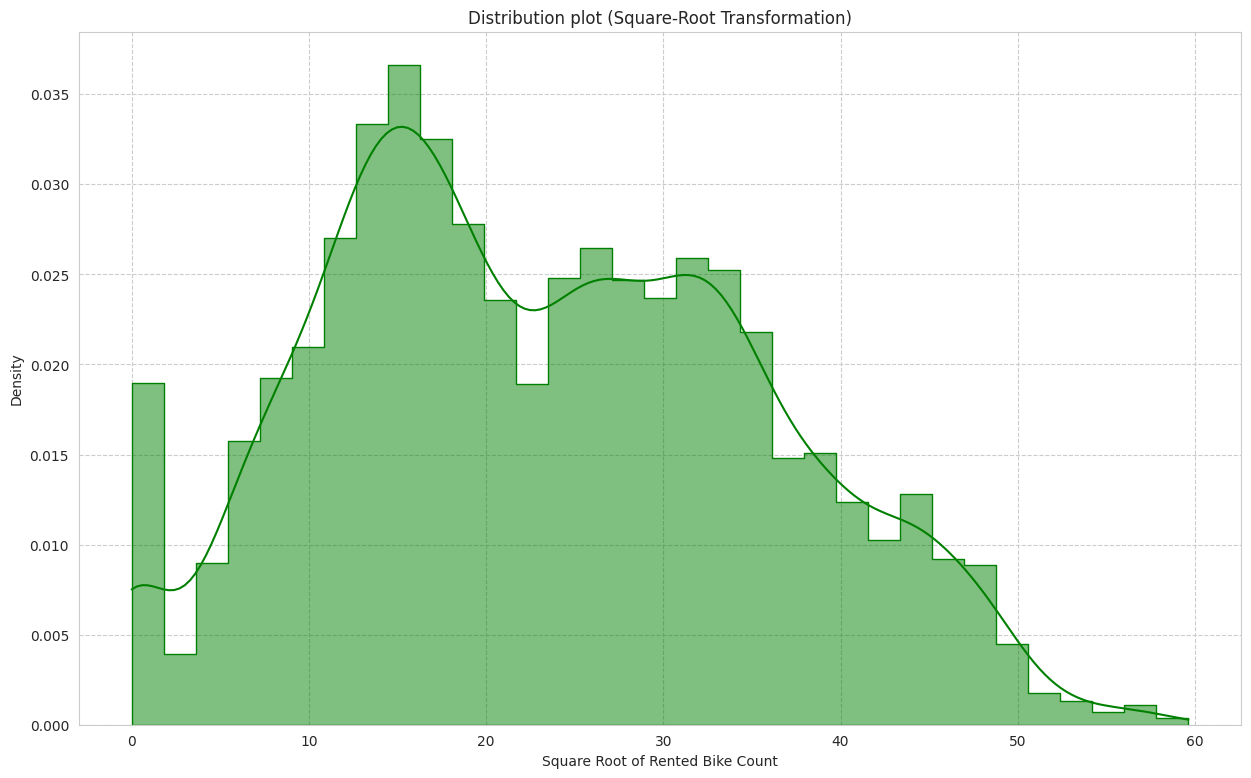

In [ ]:
# applying square-root transformation
plt.figure(figsize=(15, 9))
transformed_data = np.sqrt(bike_df["Rented Bike Count"])
sns.histplot(transformed_data, kde=True, color='g', element='step', stat='density', common_norm=False)
plt.title("Distribution plot (Square-Root Transformation)")
plt.xlabel("Square Root of Rented Bike Count")
plt.ylabel("Density")
plt.show()

In [ ]:
#checking skewness score
np.sqrt(bike_df["Rented Bike Count"]).skew()

0.237362090985412

looks Like almost normal distribution.

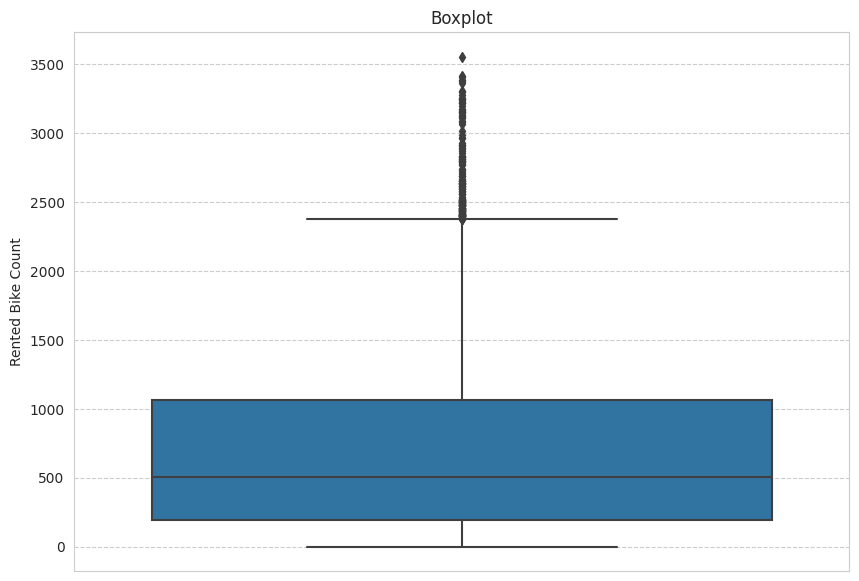

In [ ]:
#boxplot for finding outliers
plt.figure(figsize=(10, 7))
sns.boxplot(y=bike_df["Rented Bike Count"])
plt.title("Boxplot")
plt.ylabel("Rented Bike Count")
plt.show()

Median for 'Rented Bike Count' is 500 and we can see some outliers over there. So to remove them we have to use 'showfliers' parameter and set it to 'False'.

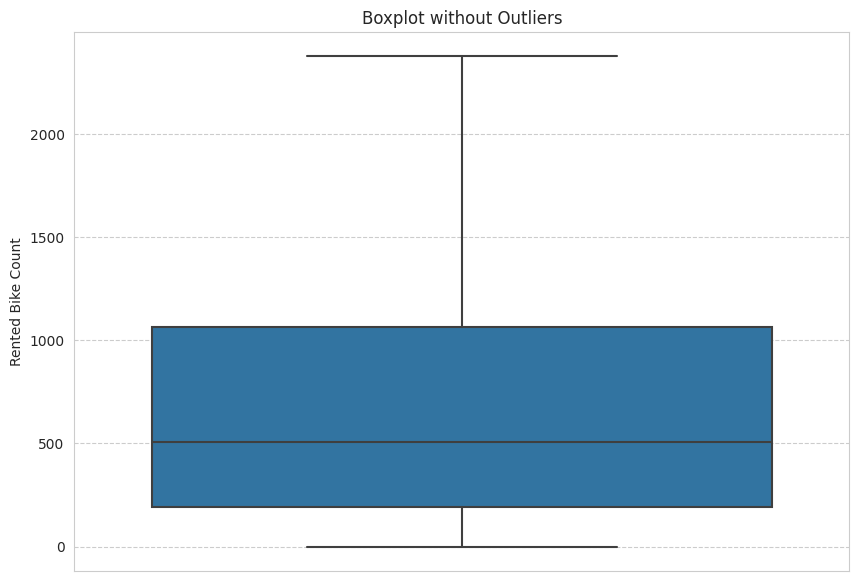

In [ ]:
#boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(y=bike_df["Rented Bike Count"], showfliers=False)
plt.title("Boxplot without Outliers")
plt.ylabel("Rented Bike Count")
plt.show()

## Independent Variables

### Numerical Variables


In [9]:
#making list of numerical variables
numerical_variables = list(bike_df.describe().columns[1:])
numerical_variables

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
#summary of numerical features
bike_df[numerical_variables].describe()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count  8760.000000      8760.000000  8760.000000       8760.000000   
mean     11.500000        12.882922    58.226256          1.724909   
std       6.922582        11.944825    20.362413          1.036300   
min       0.000000       -17.800000     0.000000          0.000000   
25%       5.750000         3.500000    42.000000          0.900000   
50%      11.500000        13.700000    57.000000          1.500000   
75%      17.250000        22.500000    74.000000          2.300000   
max      23.000000        39.400000    98.000000          7.400000   

       Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
count       8760.000000                8760.000000              8760.000000   
mean        1436.825799                   4.073813                 0.569111   
std          608.298712                  13.060369                 0.868746   
min           27.000000                 -30.600000                 0.000000   
25%          940.000000                  -4.700000                 0.000000   
50%         1698.000000                   5.100000                 0.010000   
75%         2000.000000                  14.800000                 0.930000   
max         2000.000000                  27.200000                 3.520000   

       Rainfall(mm)  Snowfall (cm)          Day        Month  
count   8760.000000    8760.000000  8760.000000  8760.000000  
mean       0.148687       0.075068    15.720548     6.526027  
std        1.128193       0.436746     8.796749     3.448048  
min        0.000000       0.000000     1.000000     1.000000  
25%        0.000000       0.000000     8.000000     4.000000  
50%        0.000000       0.000000    16.000000     7.000000  
75%        0.000000       0.000000    23.000000    10.000000  
max       35.000000       8.800000    31.000000    12.000000

As these columns are numerical columns , we can use histogram visualisation to understand their distribution

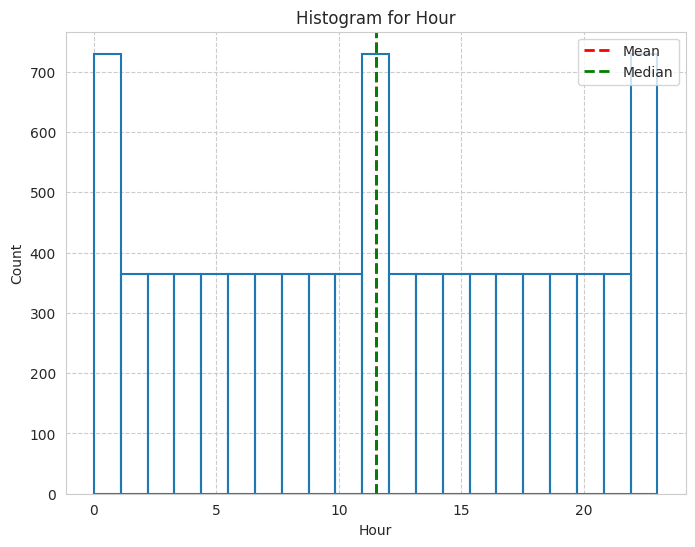

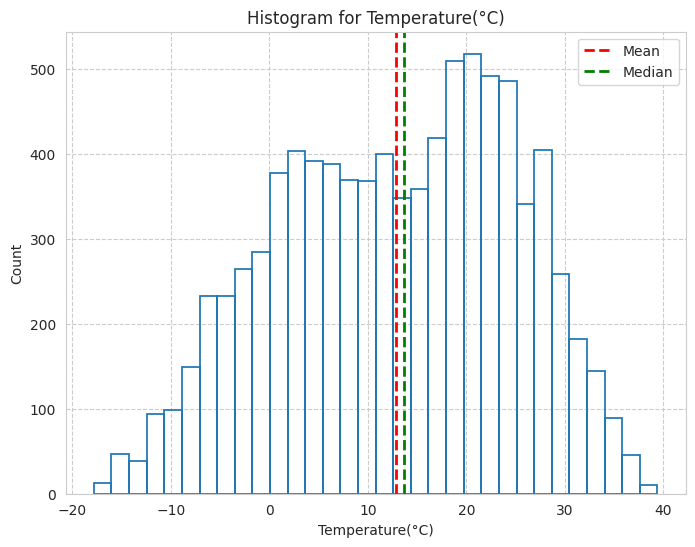

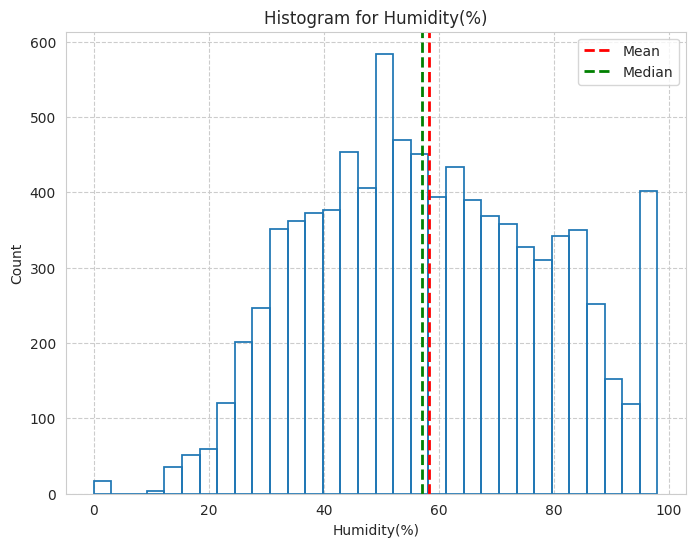

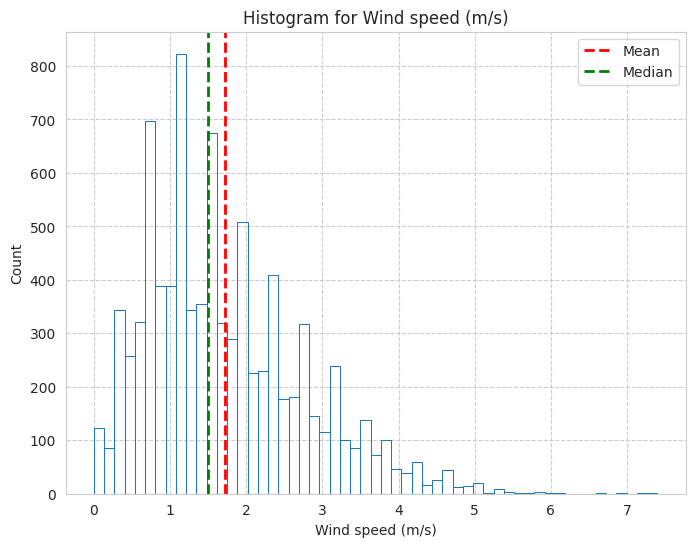

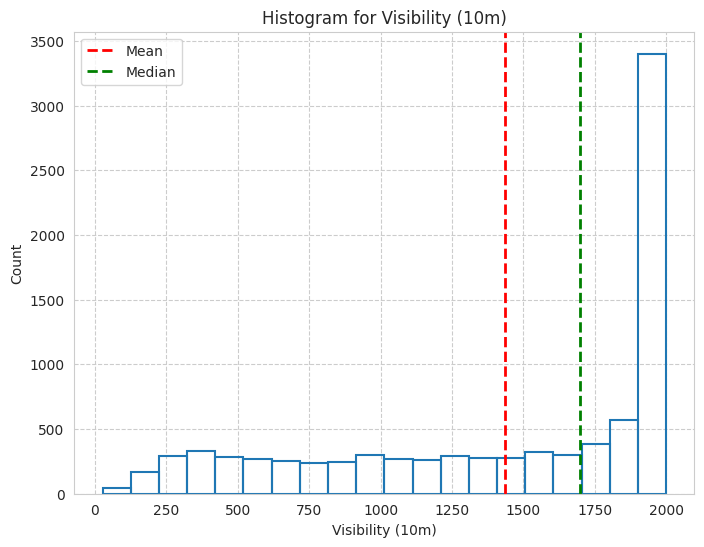

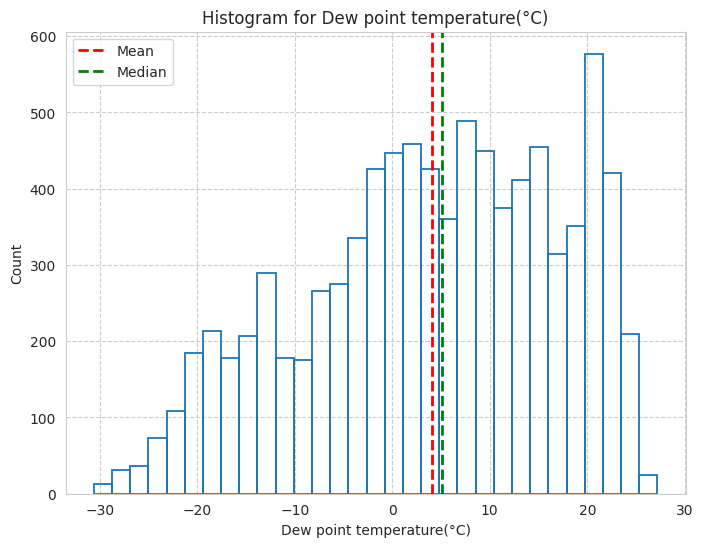

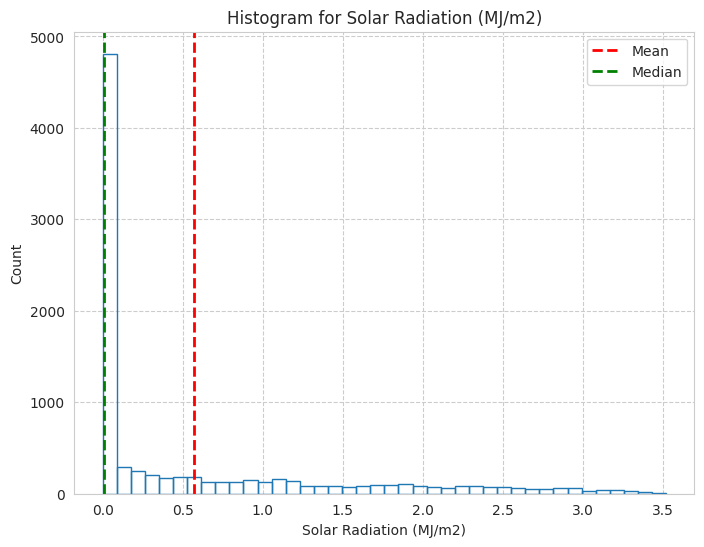

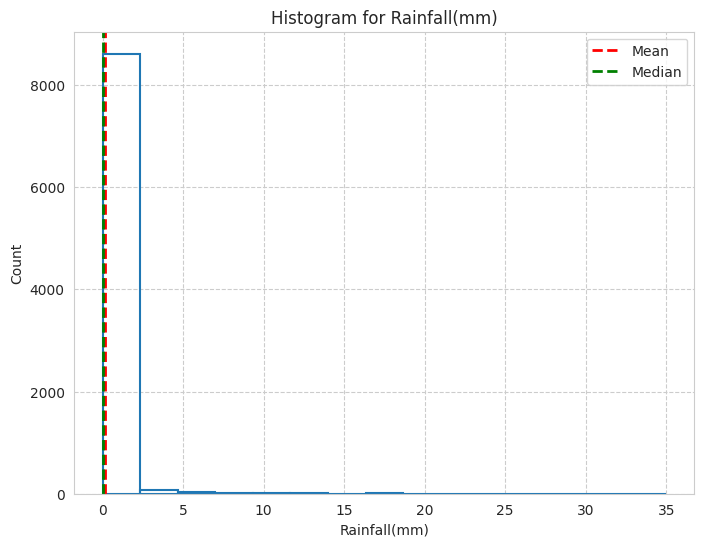

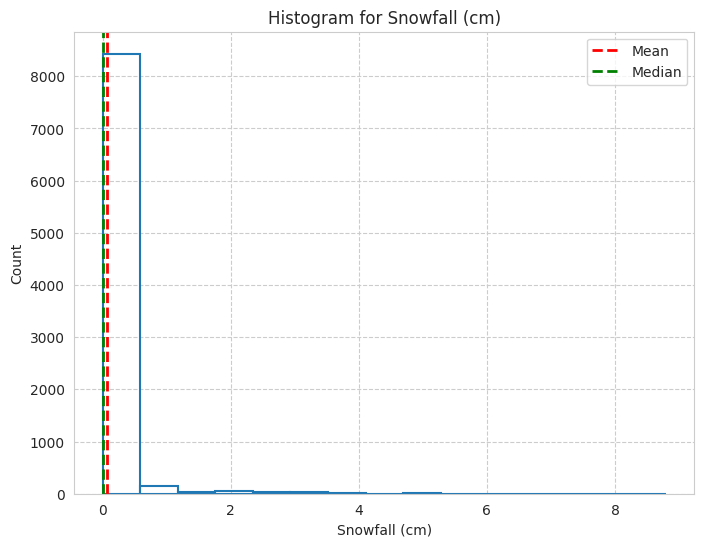

In [10]:
# histogram for each numerical feature count
for column in numerical_variables:
    num_feature = bike_df[column]

    plt.figure(figsize=(8, 6))
    sns.histplot(num_feature, fill=False)
    plt.axvline(num_feature.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(num_feature.median(), color='green', linestyle='dashed', linewidth=2, label='Median')

    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.legend()

    plt.show()

* Variables like 'Wind Speed' ,'Solar Radiation' , 'Rainfall' and 'Snowfall' are positively skewed.

* Visibility has negetive skewed distribution.

To find out outliers present in these features , we use Boxplot.

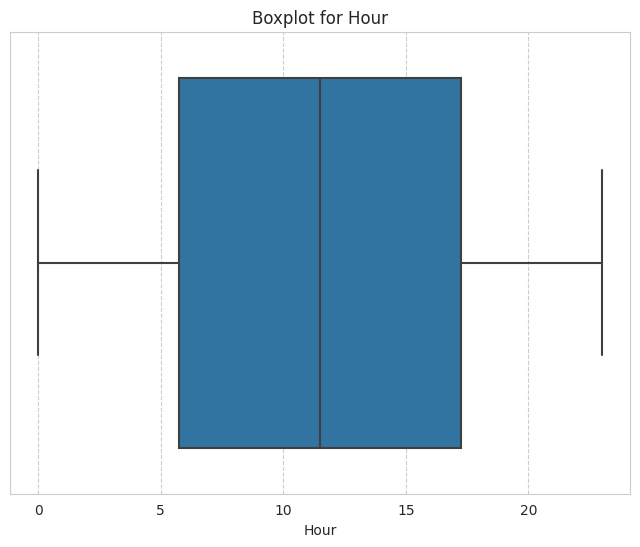

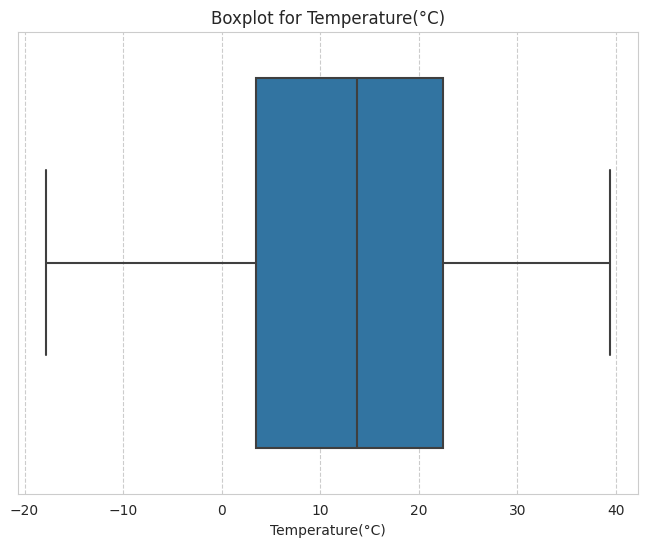

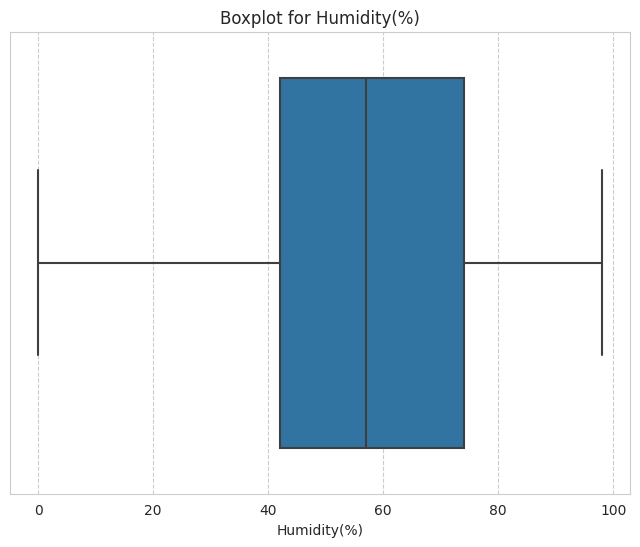

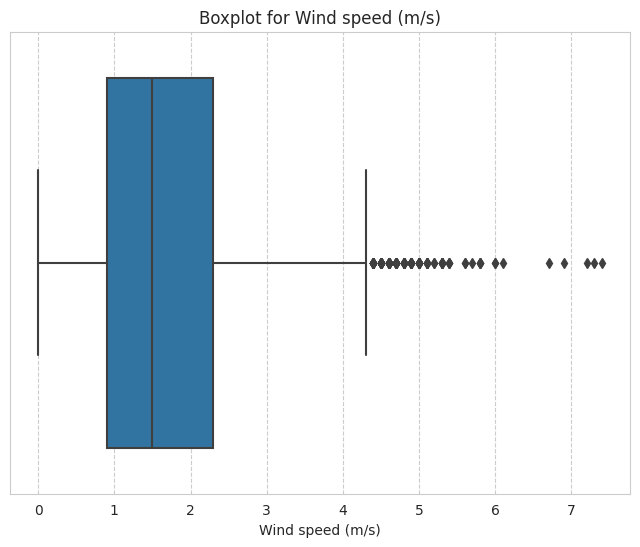

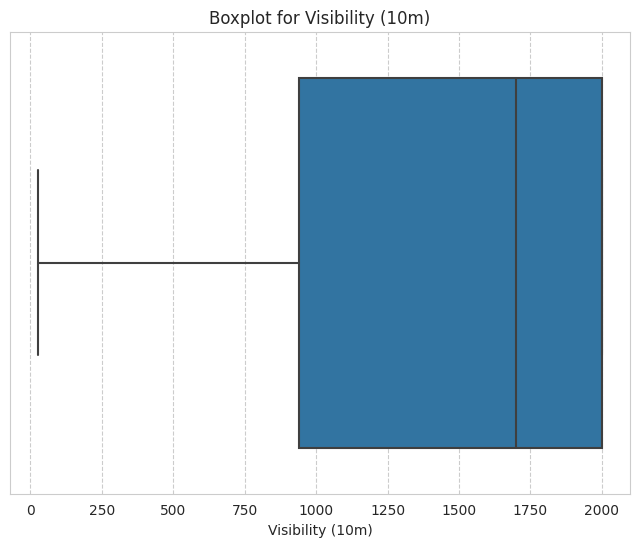

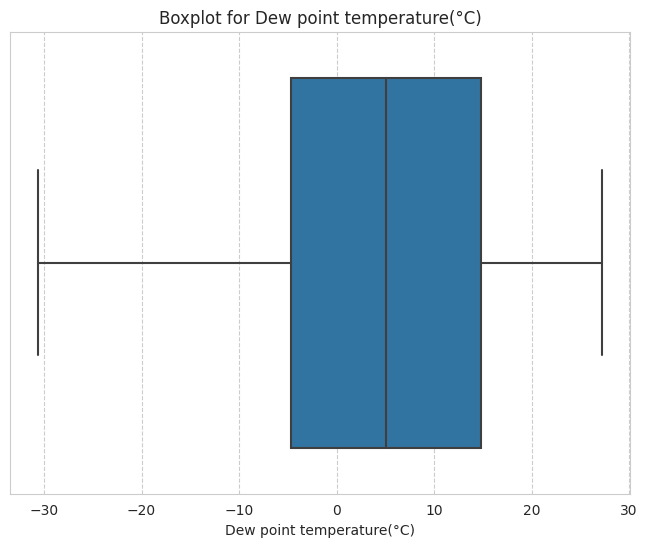

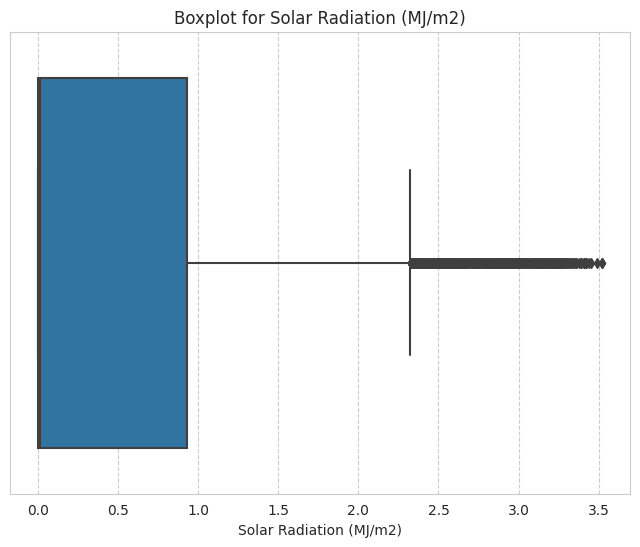

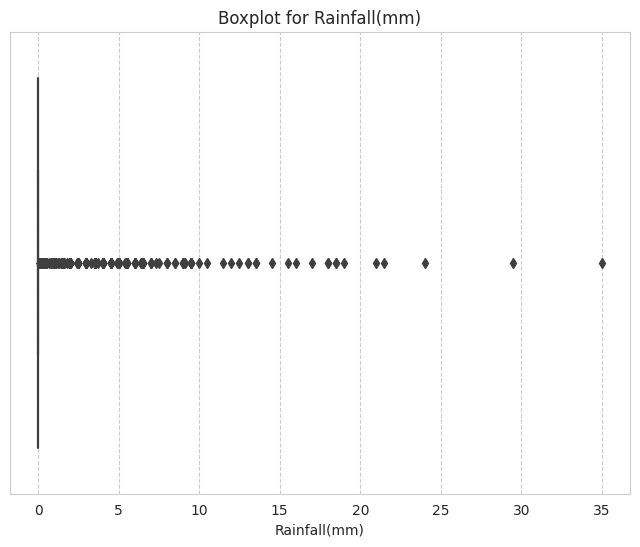

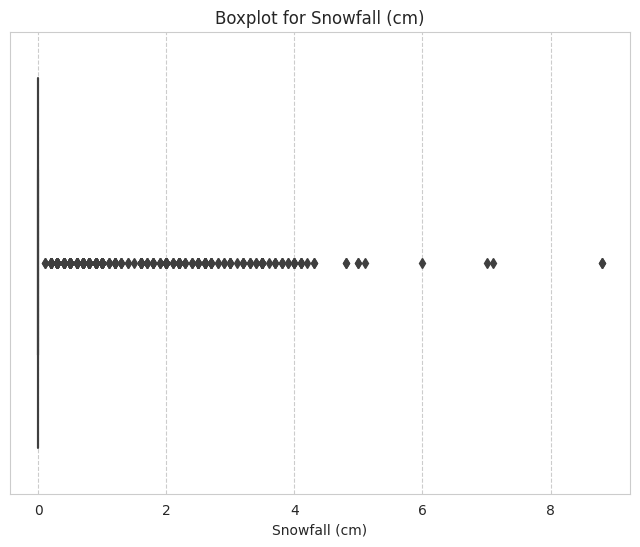

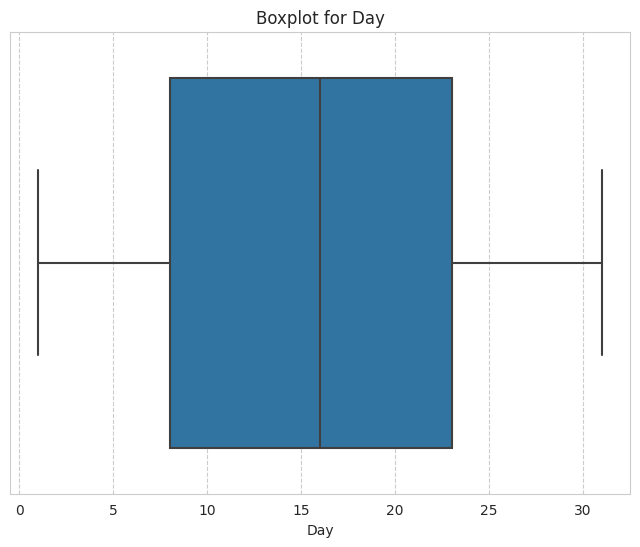

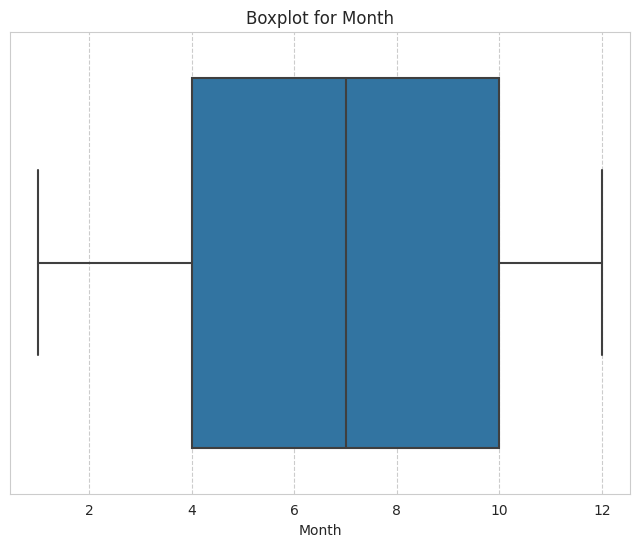

In [ ]:
# boxplot for each numerical feature
for column in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=bike_df[column])

    plt.title(f"Boxplot for {column}")
    plt.xlabel(column)

    plt.show()

Variables such as wind speed (m/s), solar radiation (mj/m2), rainfall(mm), snowfall (cm) has outliers as seen in the boxplot.We can remove these outliers using different transformation technique.

## Categorical Variables

In [ ]:
#list of categorical variables
categorical_variables = bike_df.select_dtypes(include = "object" )
categorical_variables

Seasons     Holiday Functioning Day Day_of_week
0     Winter  No Holiday             Yes      Friday
1     Winter  No Holiday             Yes      Friday
2     Winter  No Holiday             Yes      Friday
3     Winter  No Holiday             Yes      Friday
4     Winter  No Holiday             Yes      Friday
...      ...         ...             ...         ...
8755  Autumn  No Holiday             Yes      Friday
8756  Autumn  No Holiday             Yes      Friday
8757  Autumn  No Holiday             Yes      Friday
8758  Autumn  No Holiday             Yes      Friday
8759  Autumn  No Holiday             Yes      Friday

[8760 rows x 4 columns]

In [ ]:
#find unique values in "Seasons"
list(bike_df['Seasons'].unique())

['Winter', 'Spring', 'Summer', 'Autumn']

In [ ]:
#find unique values in "Holiday"
list(bike_df['Holiday'].unique())

['No Holiday', 'Holiday']

In [ ]:
#find unique values in "Functioning Day"
list(bike_df['Functioning Day'].unique())

['Yes', 'No']

In [ ]:
#find unique values in "Day_of_week"
list(bike_df['Day_of_week'].unique())

['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']

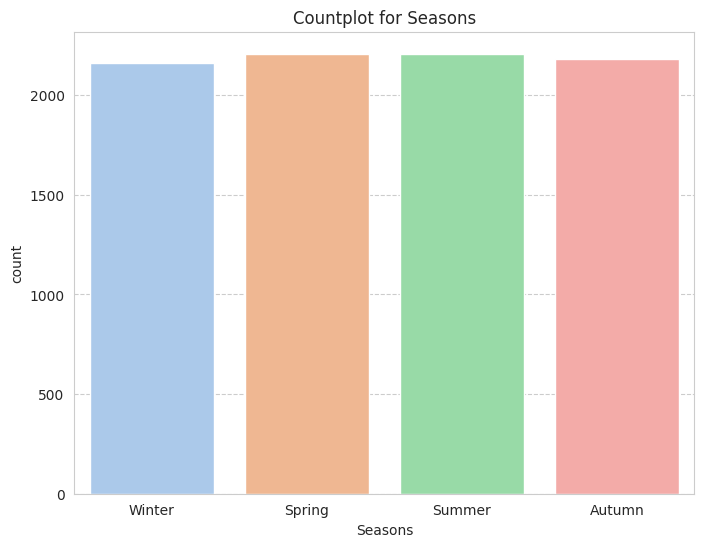

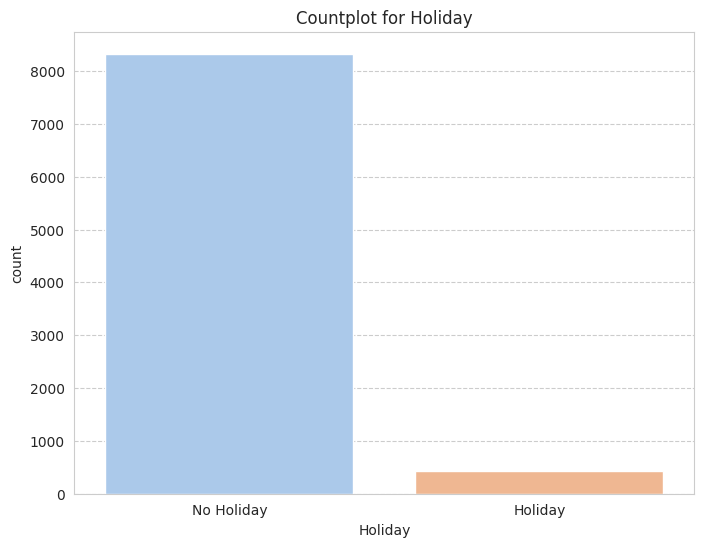

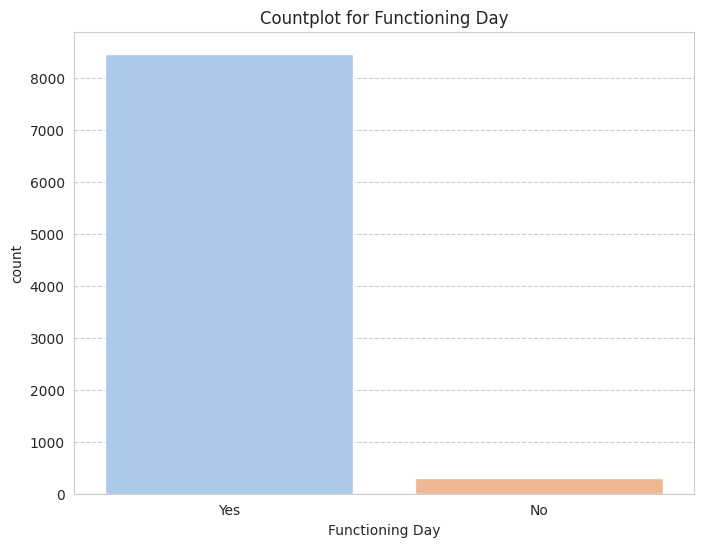

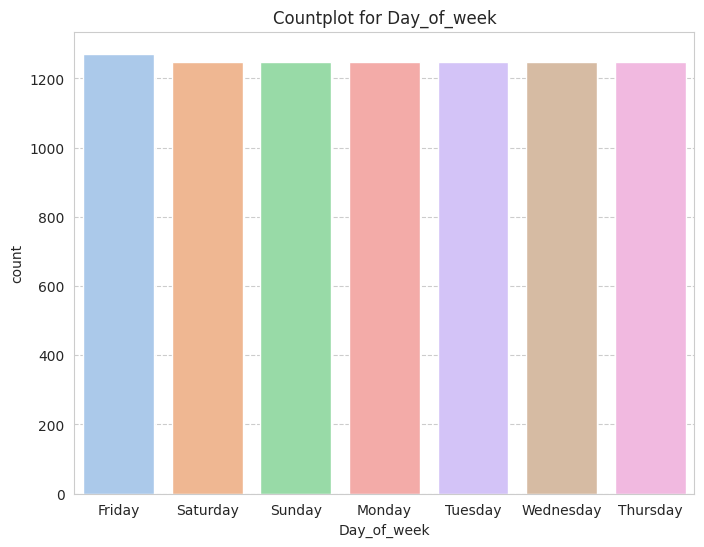

In [ ]:
#countplot
for column in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=bike_df, x=column, palette='pastel')

    plt.title(f"Countplot for {column}")
    plt.xlabel(column)

    plt.show()

In every season , each week day seems like a functional day and there are very few holiday and non-functional day counts.

Number of No Holiday days are significantly big infront Holidays.

## Bivariate Analysis

### Numerical Variable vs "Rented Bike Count"

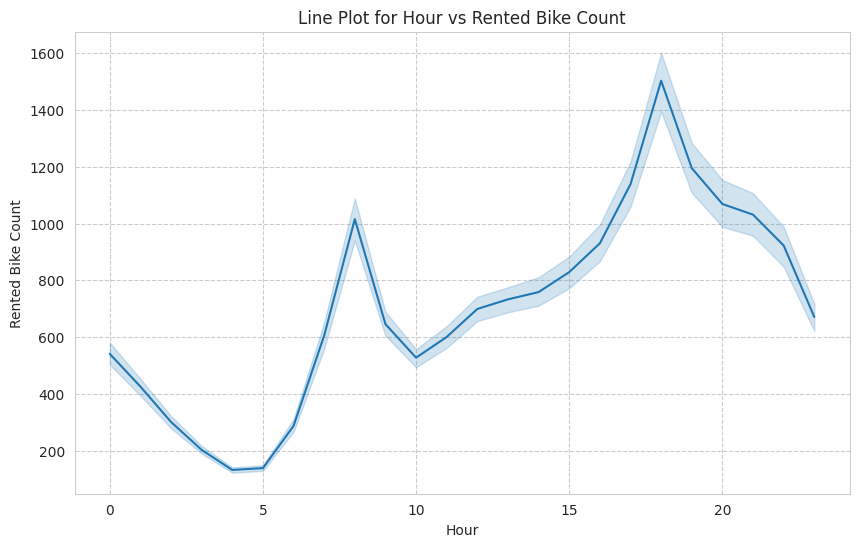

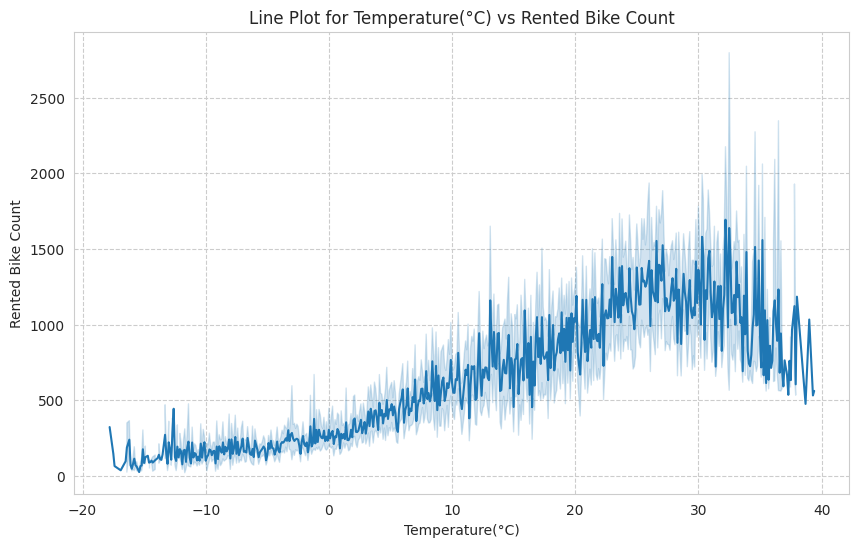

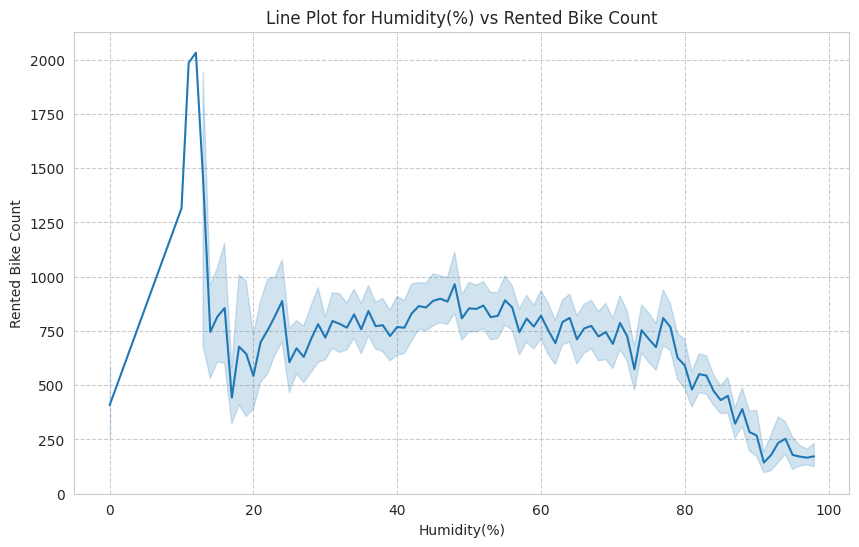

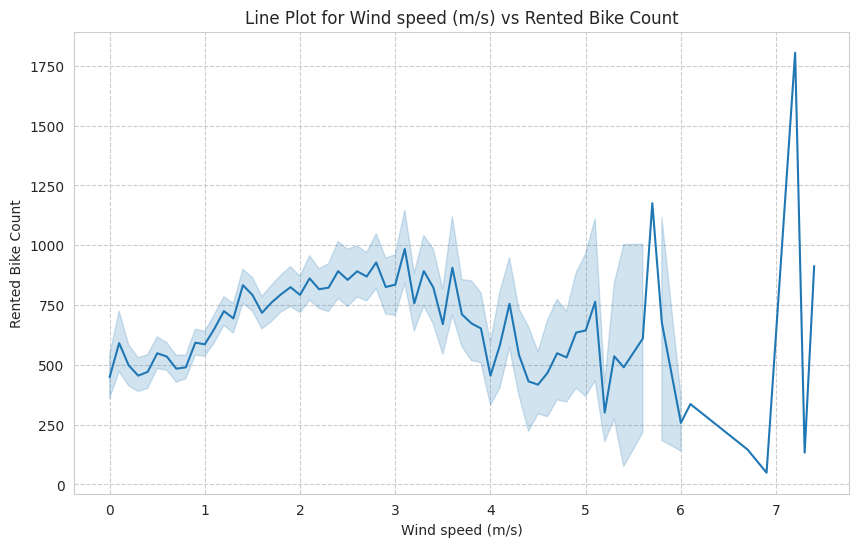

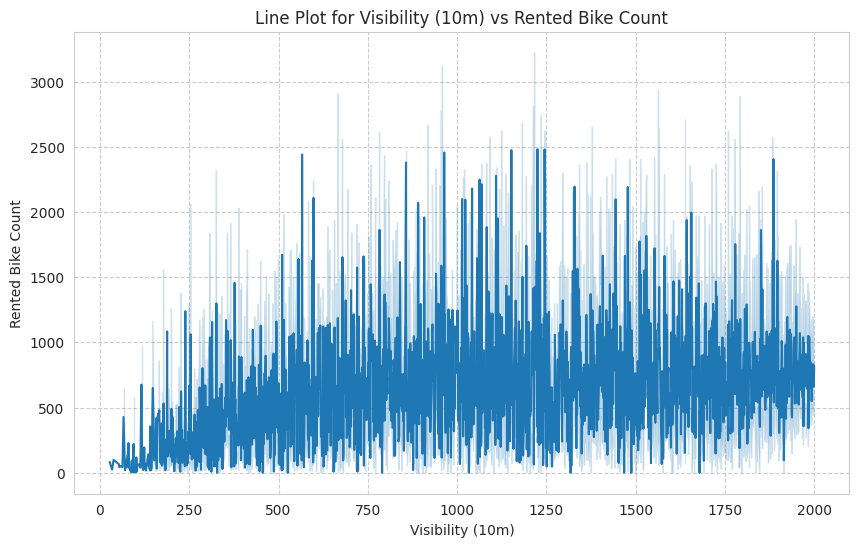

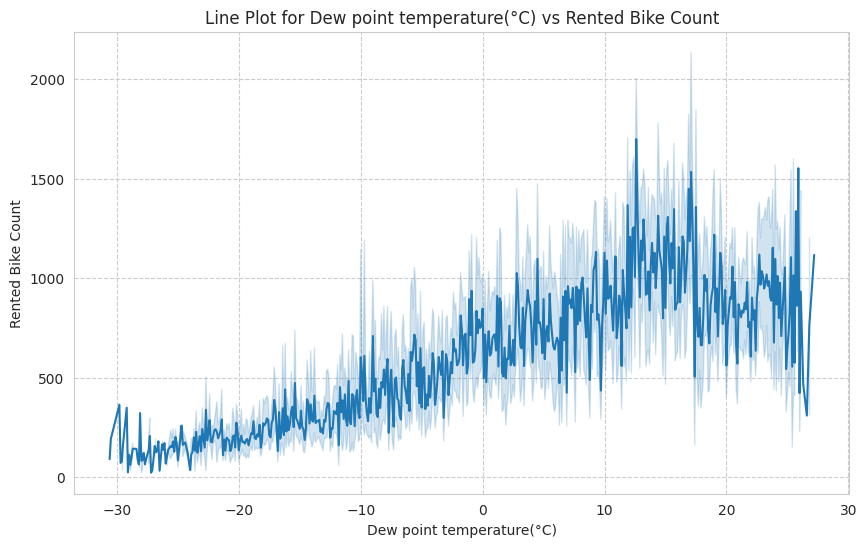

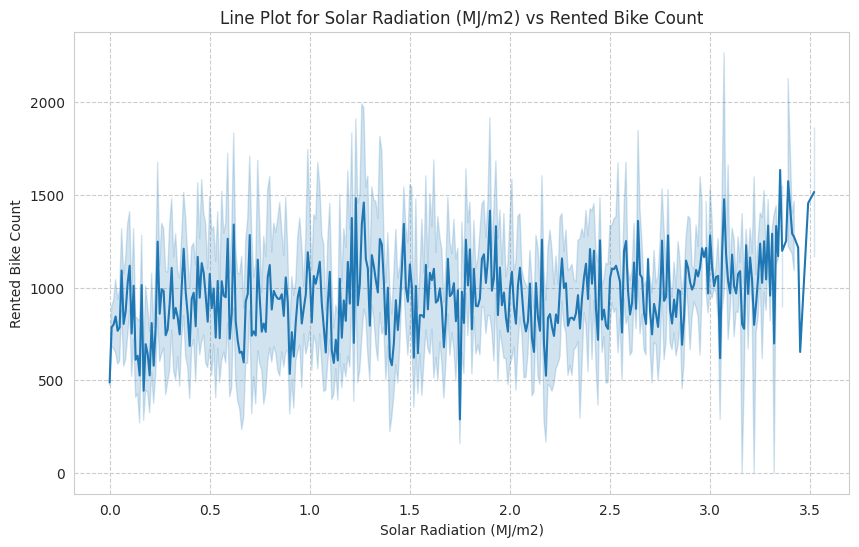

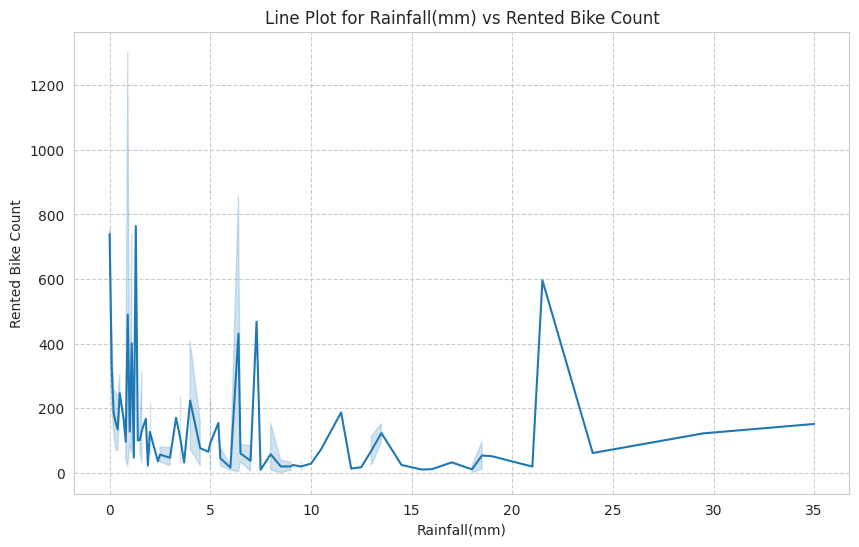

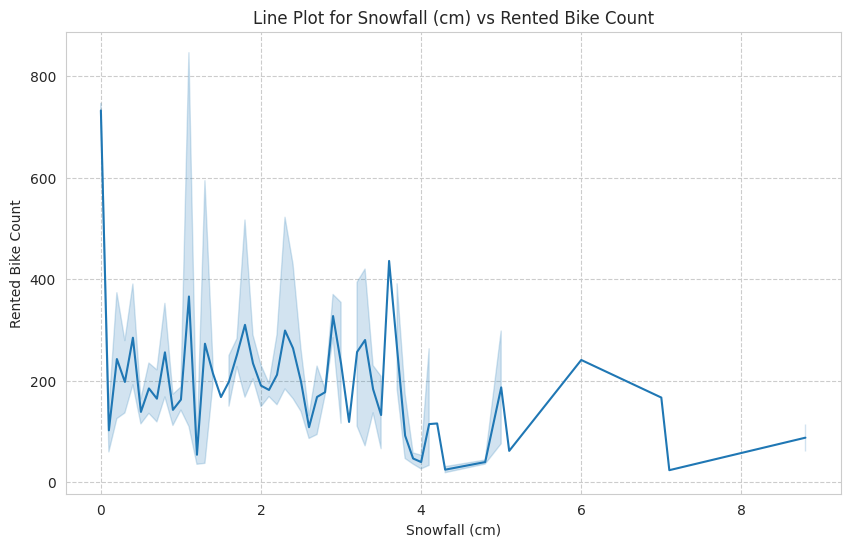

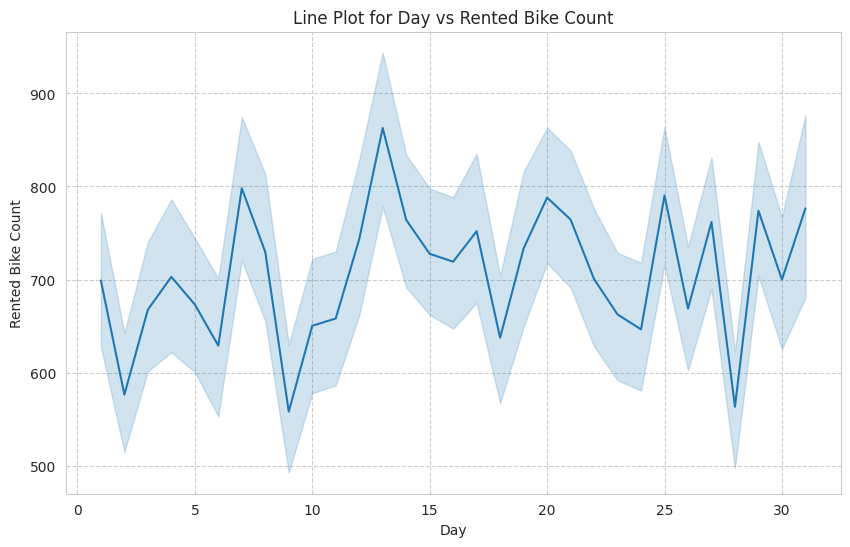

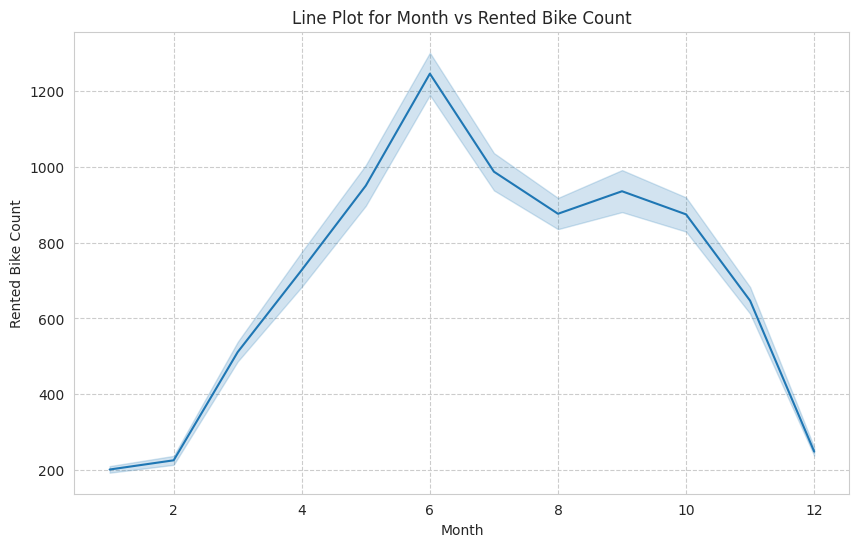

In [ ]:
for column in numerical_variables:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=bike_df[column], y=bike_df['Rented Bike Count'], palette='pastel')

    plt.title(f"Line Plot for {column} vs Rented Bike Count")
    plt.xlabel(column)
    plt.ylabel("Rented Bike Count")

    plt.show()

Observations :


*   The bike count peaks in the afternoon (from 15.00 to 20.00) where temperature is the relatively very high. From the above plot we see that, people like to ride bikes when it is pretty hot around 25°C in average.
*  With increase in Humidity and snowfall , bike count decreases which tells you that they both are inversely proportional to bike counts.

*  Solar Radiation doesn't have any impact on bike counts.
*  Even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes.
* As there are very less number of holidays count of rent bikes remains constant through out a week days.
* Count of rent bikes peaks in the month of July and goes down as soon as temperature starts decreasing and winter comes.During summer it starts increasing.





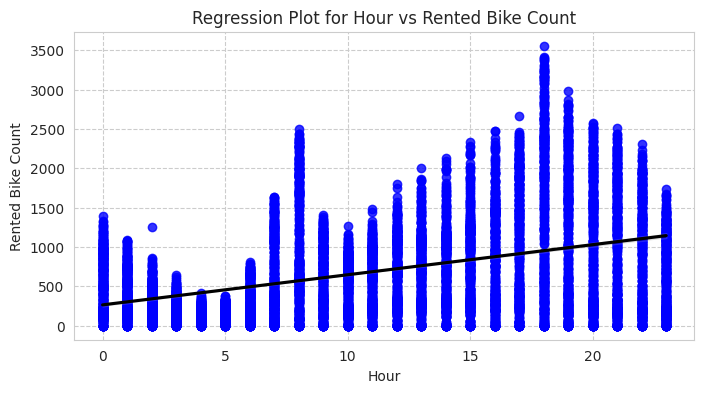

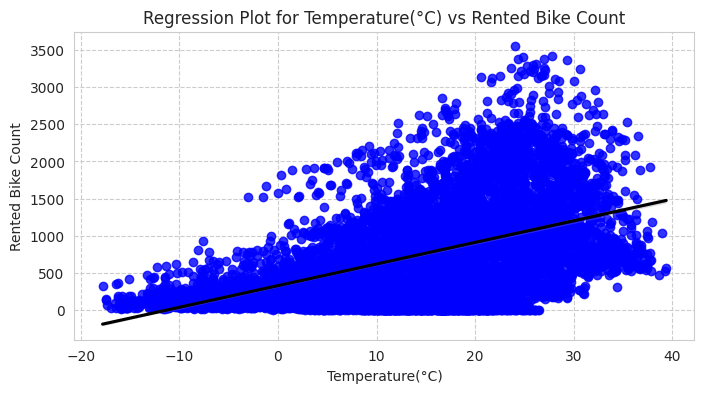

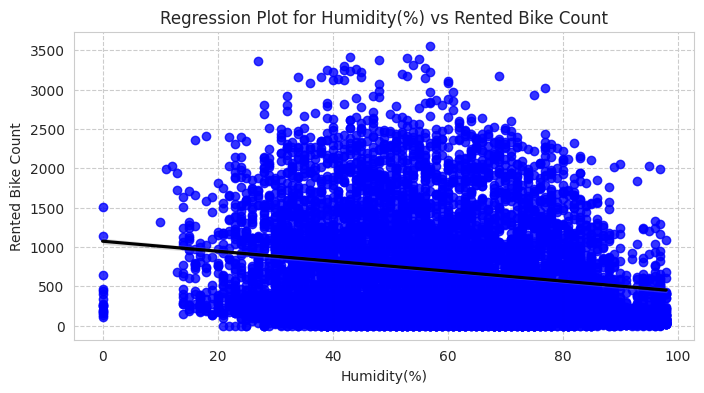

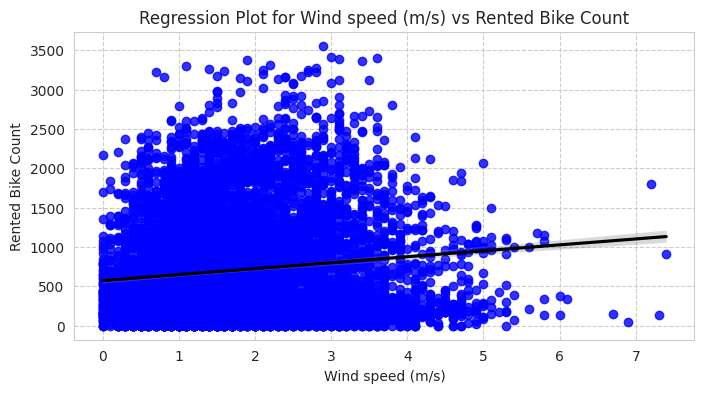

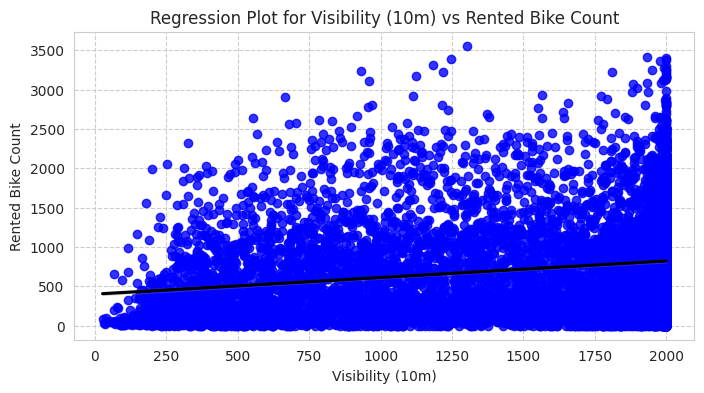

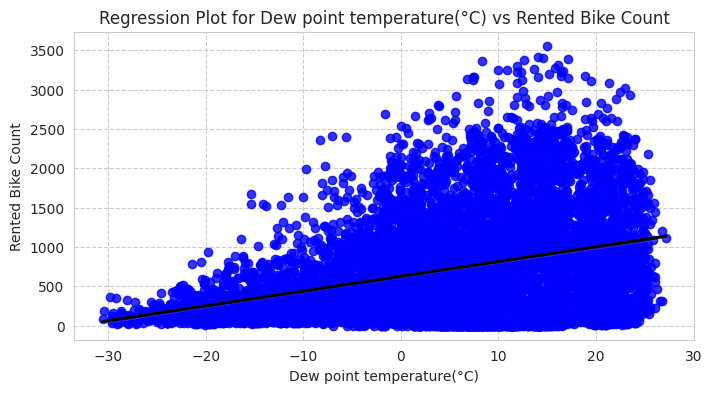

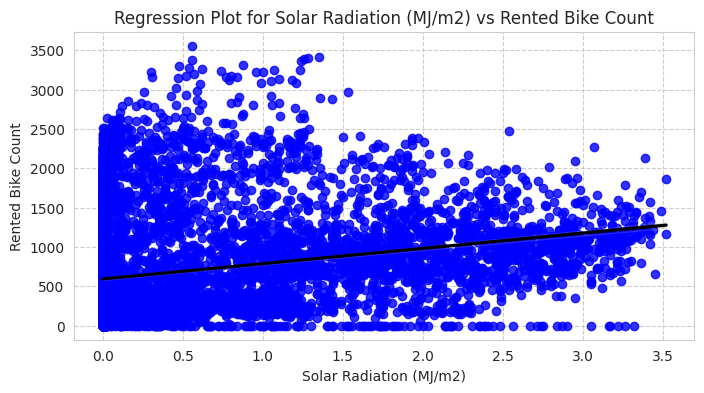

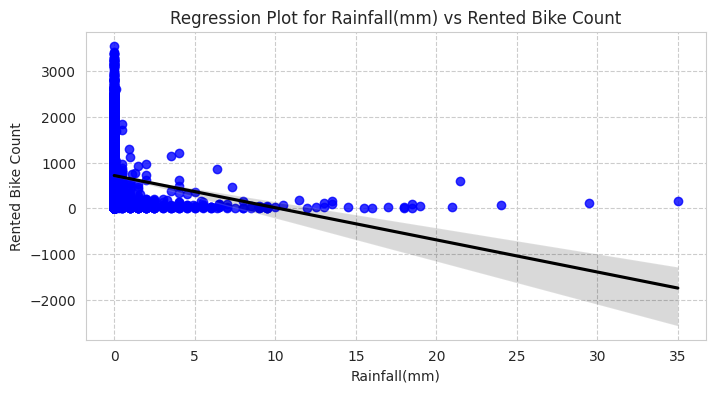

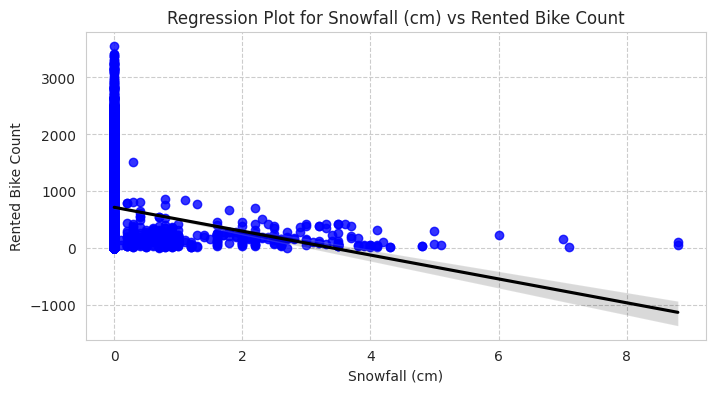

In [13]:
#printing the regression plot for all the numerical features to understand their linear relationships
for col in numerical_variables:
    plt.figure(figsize=(8, 4))
    sns.regplot(x=bike_df[col], y=bike_df['Rented Bike Count'], scatter_kws={"color": 'blue'}, line_kws={"color": "black"})

    plt.title(f"Regression Plot for {col} vs Rented Bike Count")
    plt.xlabel(col)
    plt.ylabel("Rented Bike Count")

    plt.show()

### Observations:
*  We can see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' , 'Hour' have  positive relation to the target variable. Count of Rented Bikes is directly Proportional to these features.
* Rented Bike Counts decrease with increase in features like 'Rainfall','Snowfall','Humidity'. Their relationship is negetive.

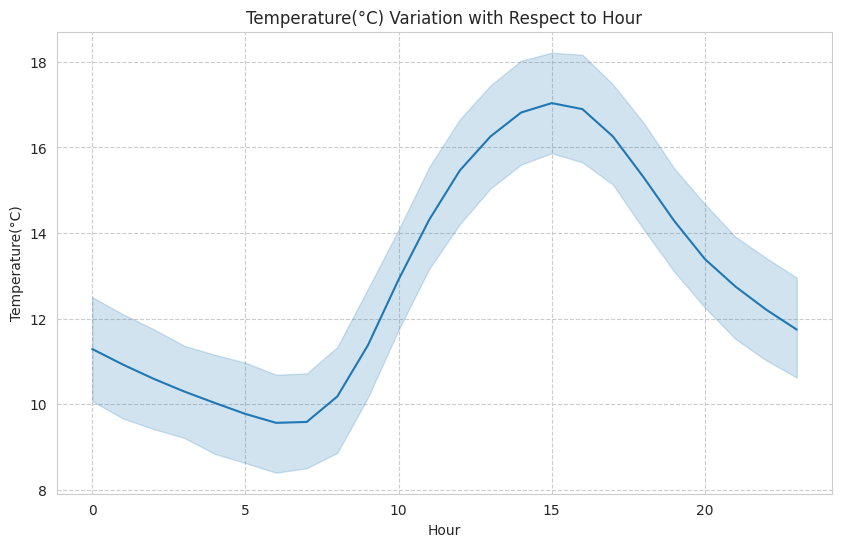

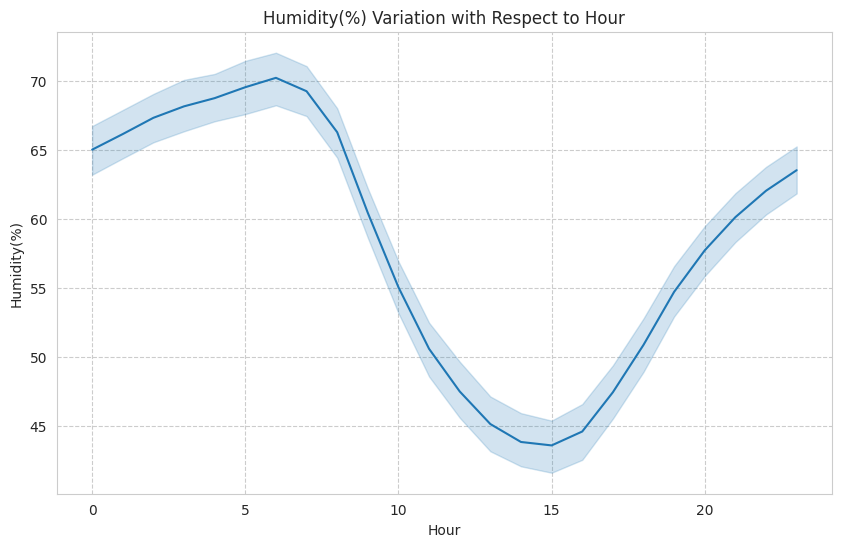

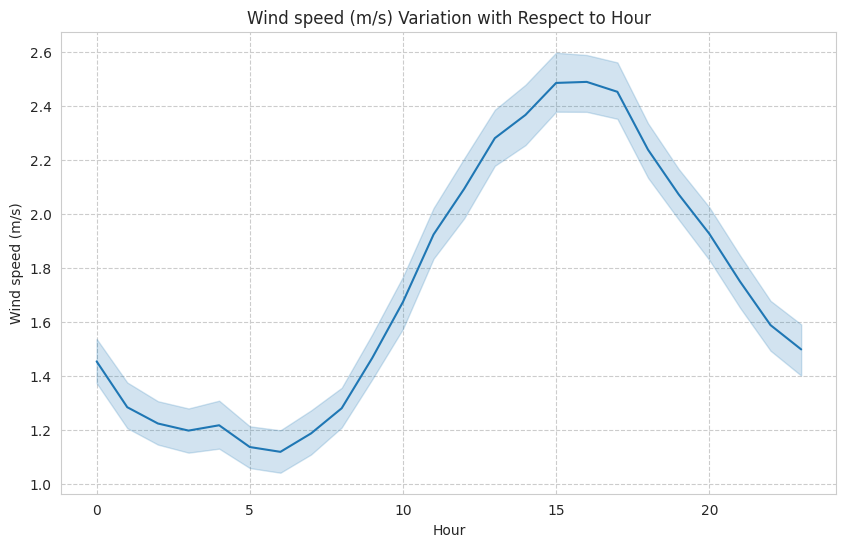

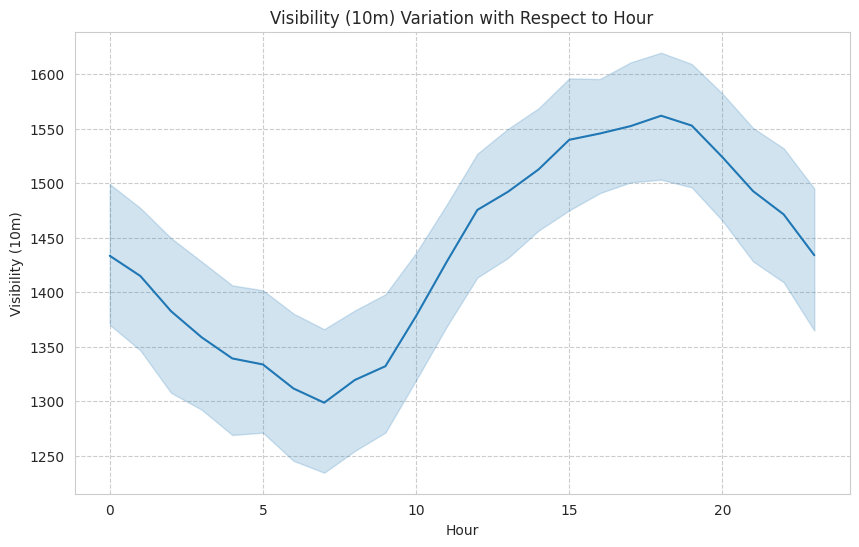

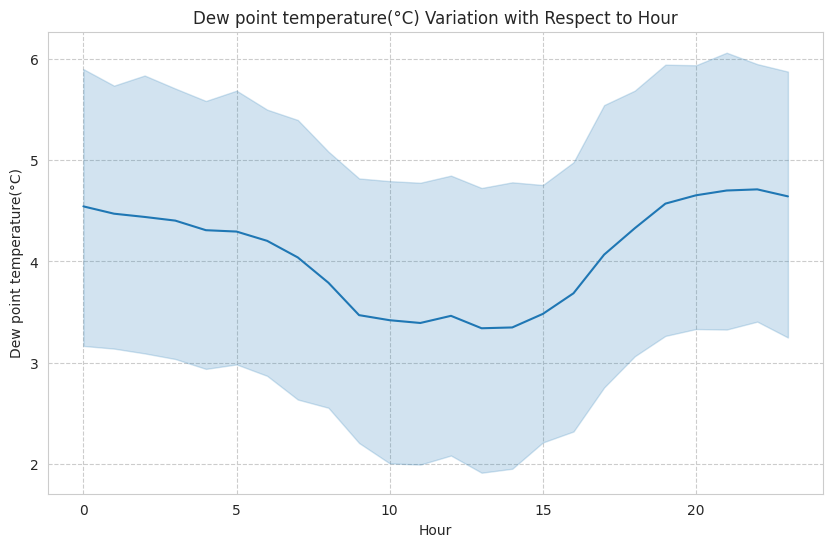

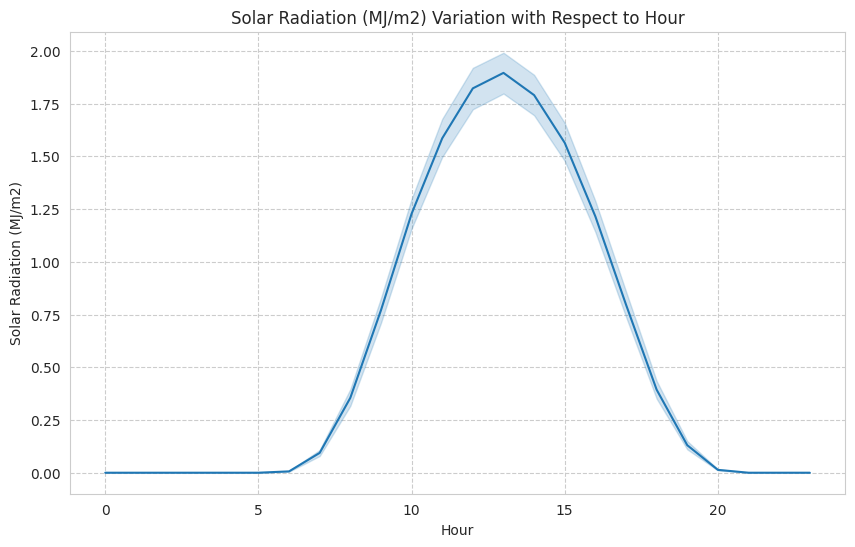

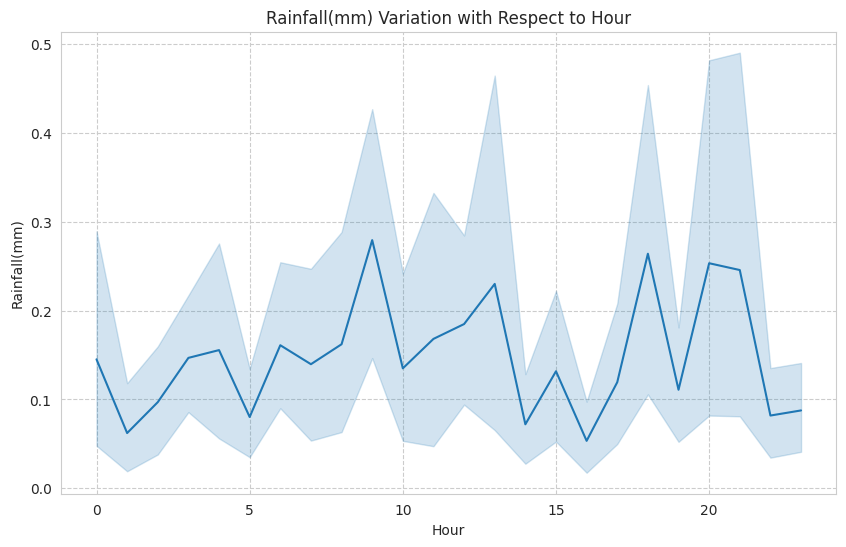

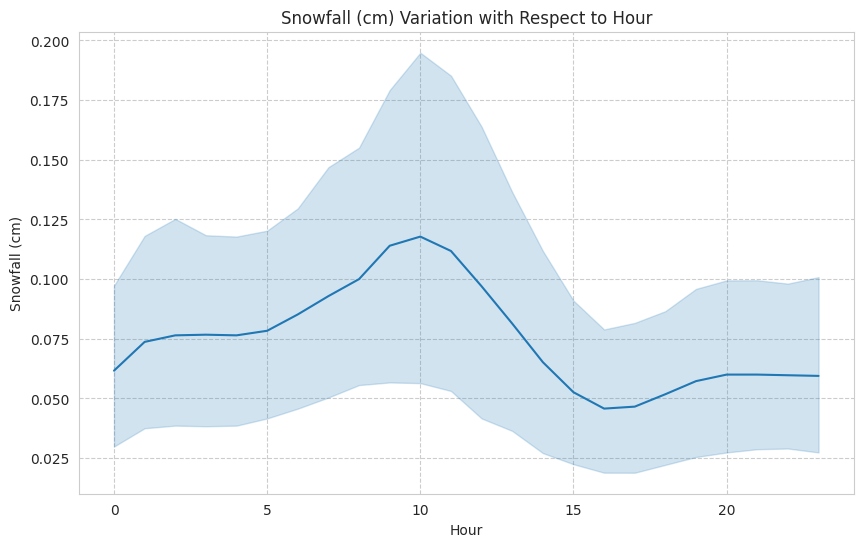

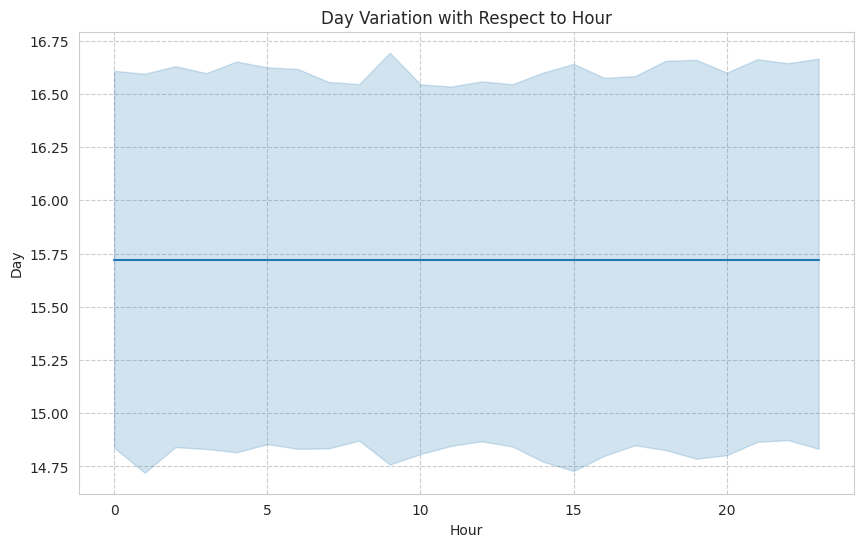

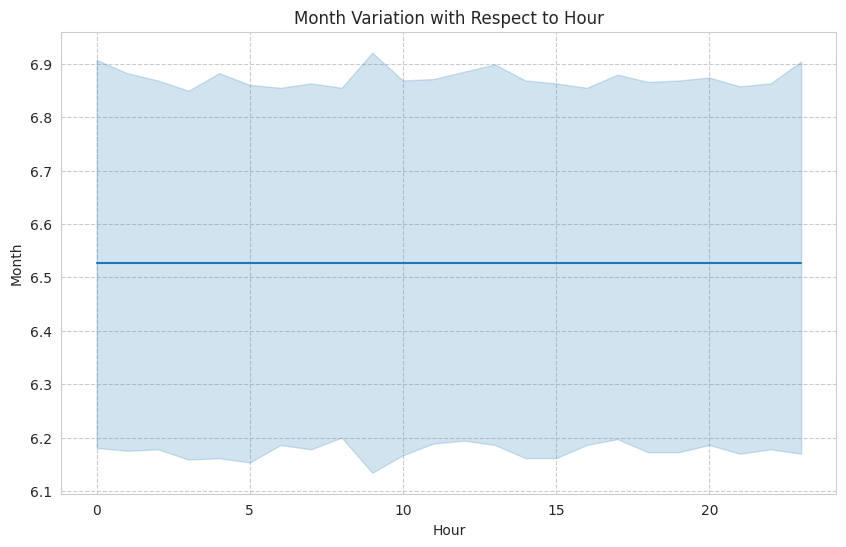

In [ ]:
#spread of Numerical variables across "Hour"
for i in numerical_variables:
    if i == 'Hour':
        continue

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Hour', y=i, data=bike_df)

    plt.title(f"{i} Variation with Respect to Hour")
    plt.xlabel("Hour")
    plt.ylabel(i)

    plt.show()

## Observation :
* At the beginning of the day the demand of rental bike increases with the highest peak in the evening and later decreasing.
* The demand of rental bike is at peak at 8am and 6pm so we can say that demand is more during office opening and closing time.
* Temperature, wind speed, solar radiation also increases and are at the peak in afternoon.

### Categorical Variables vs Rented Bike Count

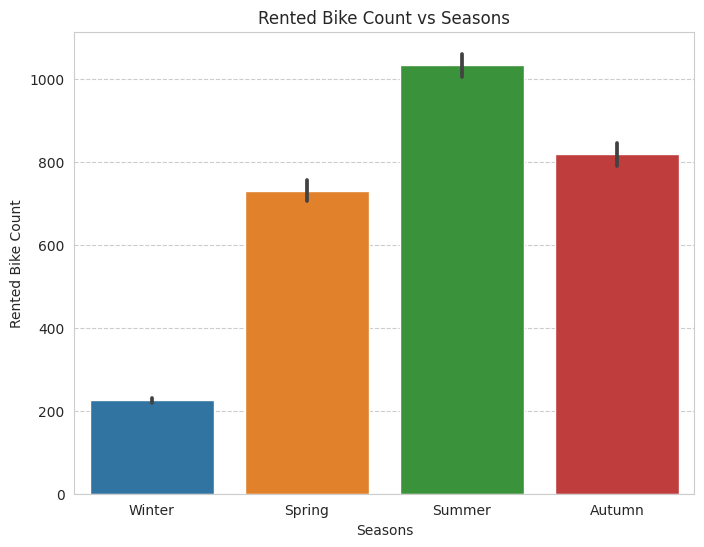

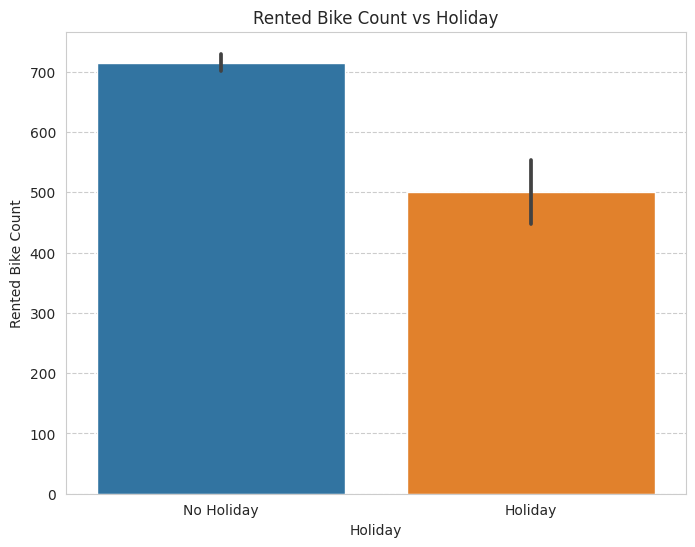

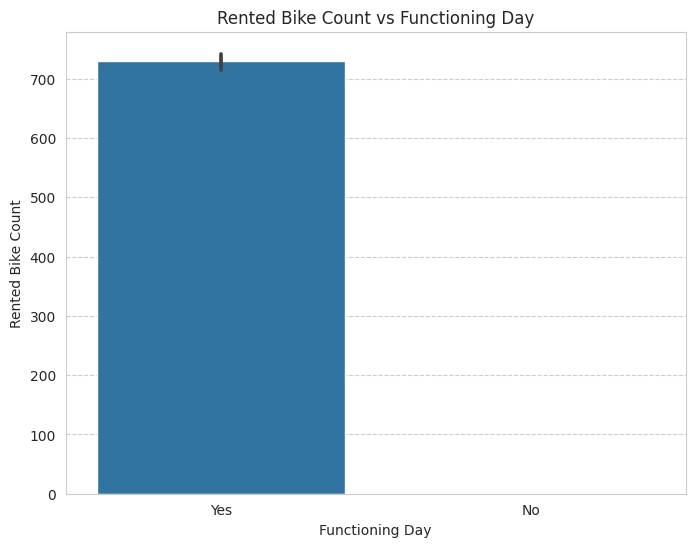

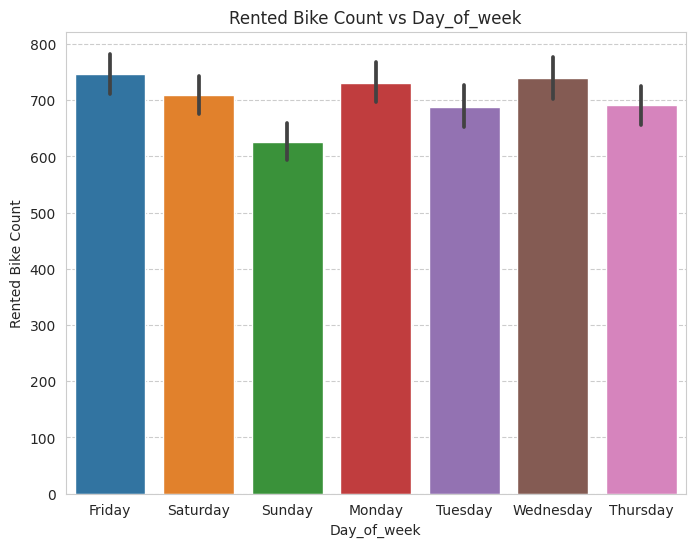

In [ ]:
#Barplot
for i in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=i, y='Rented Bike Count', data=bike_df)

    plt.title(f"Rented Bike Count vs {i}")
    plt.xlabel(i)
    plt.ylabel("Rented Bike Count")

    plt.show()

###Observations:
* In Summer the demand of rented bike is high because temperature and solar radiation is high in summer
* We have seen there are less holidays so obviously rented bike count is also less on holidays.
* Almost no demand on non functioning day.
* The demand of rental bikes slightly decreases on weekend days i.e saturday and sunday.

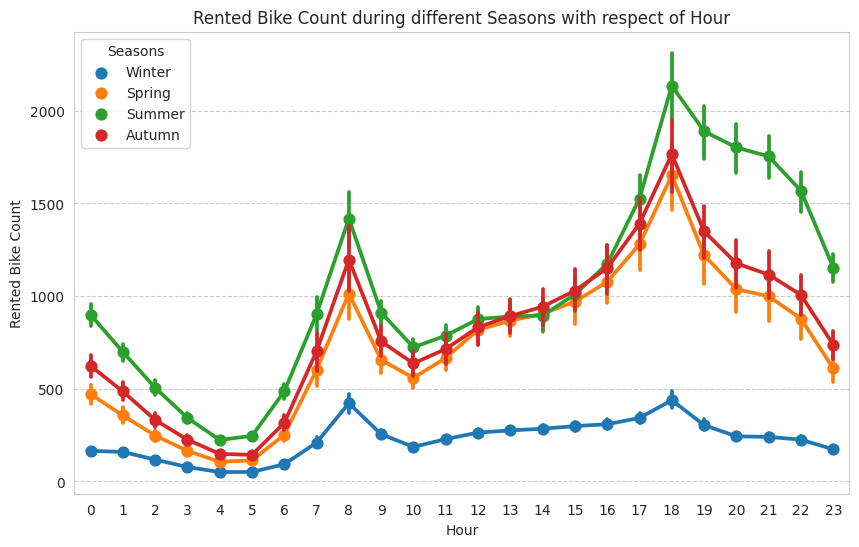

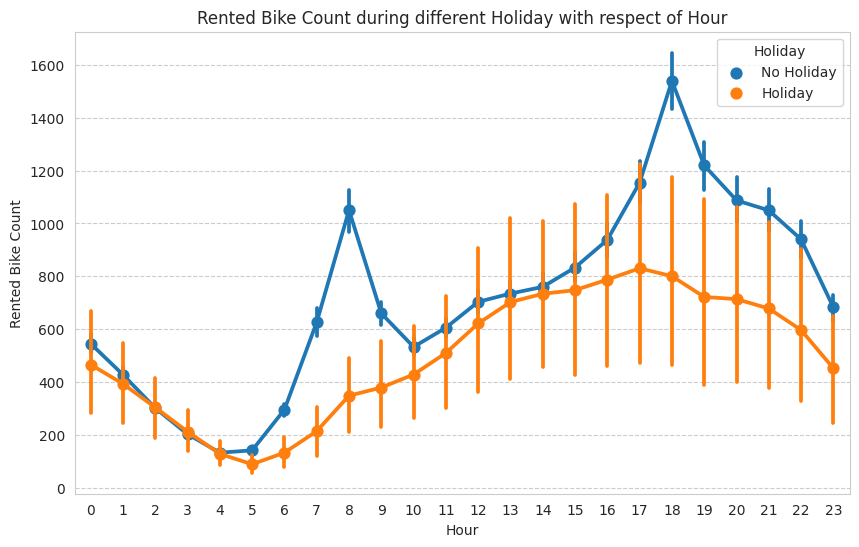

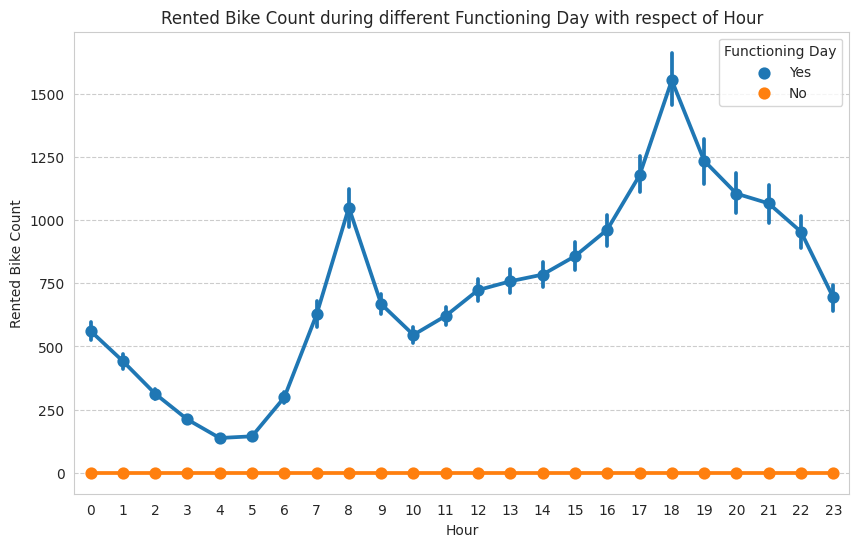

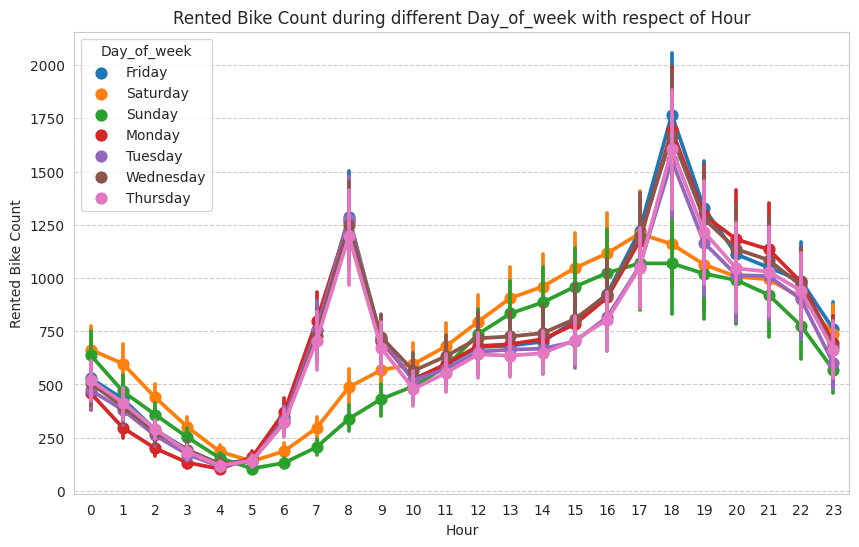

In [ ]:
# we create point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_variables:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(10,6))
    sns.pointplot(x=bike_df["Hour"],y=bike_df['Rented Bike Count'],hue=bike_df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

## Observations:
* Demand of bikes is very less in Winters and its extremely high during summers.
* Demand of bikes is extremely high for all the week days and slightly less on weekends like Sunday and Saturday. In the weekend the demand becomes high in the afternoon.
* In the Functioning Day column, If there is no Functioning Day then there is no demand.
* Non holidays have more demand because of office days maybe.

## **Feature Selection**

 **Correlation**

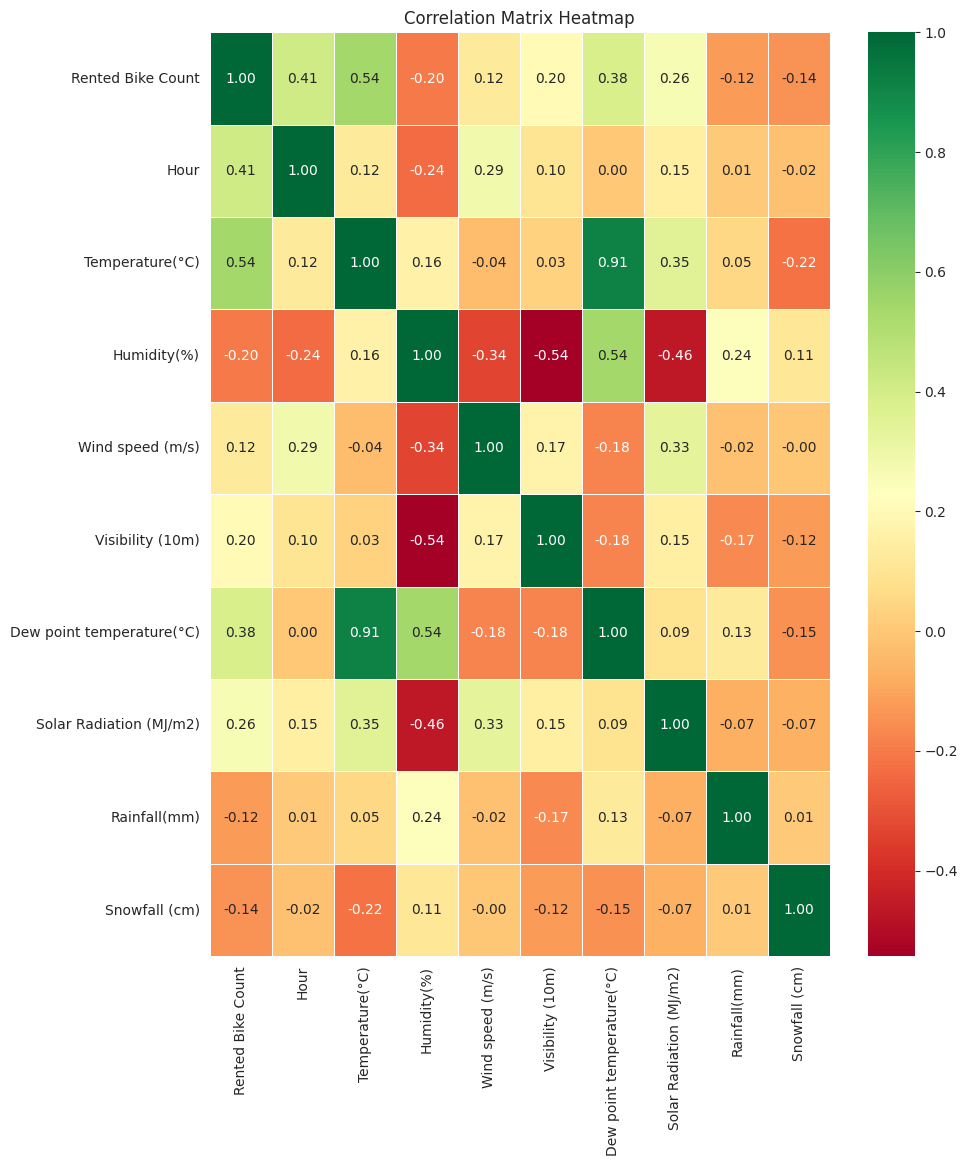

In [14]:
#correlation matrix
correlation_df = bike_df.corr()

plt.figure(figsize=(10, 12))
sns.heatmap(correlation_df, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

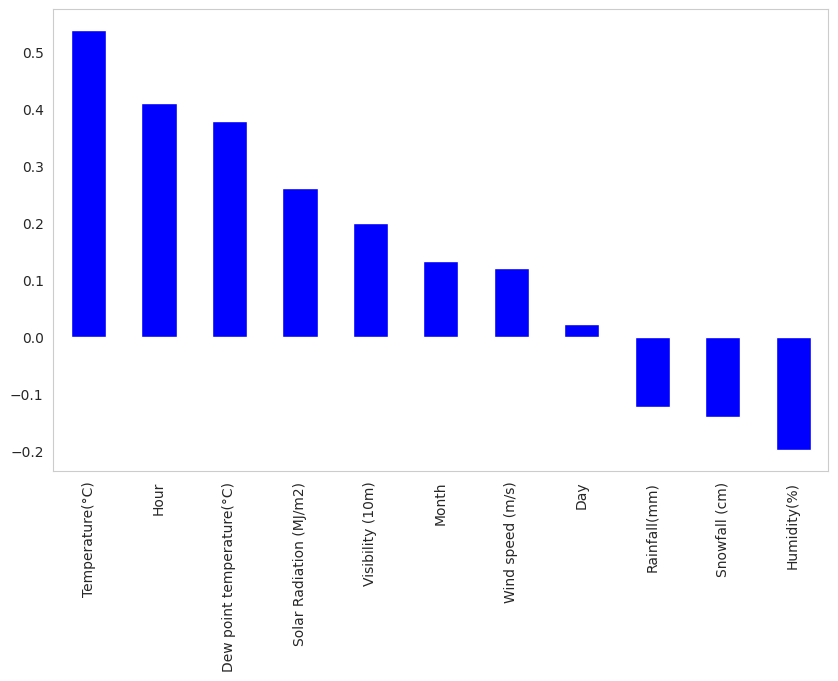

In [ ]:
#bar correlation
corr_target = bike_df.corr()['Rented Bike Count'].sort_values(ascending = False)

plt.figure(figsize = (10,6))
corr_target[1:].plot(kind = 'bar', color = 'blue')
plt.grid()
plt.show()


The most correlated features to the rented bike count are:

* hour
* temperature(°c)
* dew point temperature(°c)
* solar radiation (mj/m2)


temperature and Dew point temperature are almost 0.91 correlated, So it generates multicollinearity issue.


## Handeling Multicollinearity issue with VIF

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

* VIF starts at 1 and has no upper limit.
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [ ]:
#calling function
calculate_vif(bike_df[[col for col in numerical_variables]]).T


0                1            2                 3   \
variables     Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)   
VIF        4.42596        38.389623     8.344305          4.879565   

                         4                          5   \
variables  Visibility (10m)  Dew point temperature(°C)   
VIF                9.481423                  19.815223   

                                6             7              8         9   \
variables  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)       Day   
VIF                       2.900819      1.082134       1.144168  4.292003   

                 10  
variables     Month  
VIF        5.096115

* Here Temperature(°C) and 	Dew point temperature(°C) have high correlation VIF value.They can make whole regression model unstable.

* We need to drop one of the feature so that VIF value get reduced.

In [ ]:
#calling function VIF where Dew point temperature(°C)' , 'Day' , 'Month'are not included
calculate_vif(bike_df[[col for col in numerical_variables if col not in ['Dew point temperature(°C)' , 'Day' , 'Month']]]).T

0                1            2                 3  \
variables      Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)   
VIF        3.921832         3.228318     4.868221          4.608625   

                          4                        5             6  \
variables  Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)   
VIF                 4.71017                 2.246791      1.079158   

                       7  
variables  Snowfall (cm)  
VIF             1.120579

As you can see all these features' VIF values got reduced to under 5.00

In [ ]:
#dropping 'Dew point temperature(°C)' , 'Day' , 'Month'

bike_df = bike_df.drop(['Dew point temperature(°C)' , 'Day' , 'Month'], axis=1)

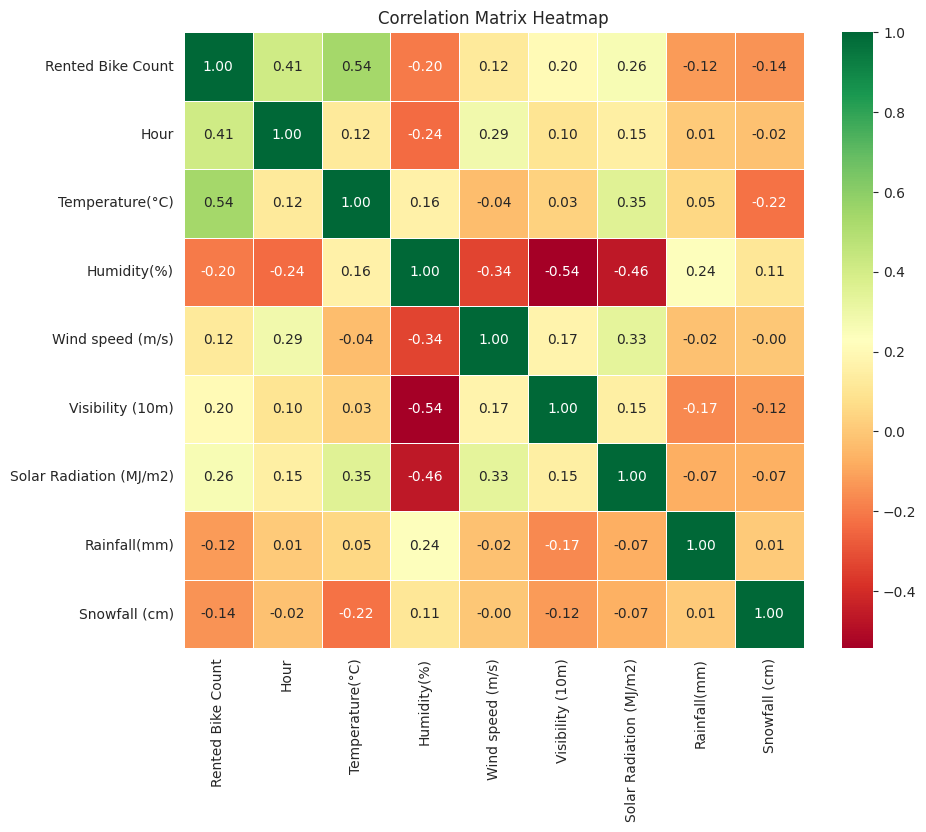

In [ ]:
#correlation matrix
correlation_df = bike_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## **Feature Enginerring**

## Feature Creation

In [ ]:
# creating column of weekend or not
bike_df['weekend']= bike_df['Day_of_week'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
bike_df.drop('Day_of_week', axis=1, inplace=True)


## Label Encoding

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()

bike_df[['Seasons','Holiday','Functioning Day']] = bike_df[['Seasons','Holiday','Functioning Day']].apply(label_encoding.fit_transform)


In [ ]:
bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Seasons  Holiday  Functioning Day  weekend  
0        3        1                1        0  
1        3        1                1        0  
2        3        1                1        0  
3        3        1                1        0  
4        3        1                1        0

### Identify Inputs and Targets

In [ ]:
# Identify the input columns (a list of column names)
X = bike_df.drop('Rented Bike Count' , axis = 1)
Y = np.sqrt(bike_df["Rented Bike Count"] )

In [ ]:
#checking shapes
X.shape , Y.shape

((8760, 12), (8760,))

So there are total 8760 datapoints and 12 features and we have to predict dependent variable 'Rented Bike Count'

## **Train Test split**

In [ ]:
#spliting data into training and testing data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size = 0.3 , random_state= 0 )

In [ ]:
#shape
X_train.shape , Y_train.shape , X_test.shape , Y_test.shape

((6132, 12), (6132,), (2628, 12), (2628,))

## **Linear Regression**

In [ ]:
#creaing instance of an algorithm

linear_reg = LinearRegression()

# fitting Linear Regression model
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#predicting value of Y_test and Y_train
Y_test_pred = linear_reg.predict(X_test)
Y_train_pred = linear_reg.predict(X_train)

In [ ]:
#Y- intercept
c = linear_reg.intercept_
c

-7.367857457543803

In [ ]:
#coeficient array  can be given by
m = linear_reg.coef_
m

array([ 4.78038514e-01,  5.56795645e-01, -1.57744402e-01,  4.32489954e-02,
        4.02047244e-04, -9.92946769e-01, -1.53370616e+00,  1.57364803e-01,
       -2.13910221e+00,  3.42660904e+00,  2.88459521e+01, -1.45660899e+00])

In [ ]:
#model scores

#score for training data
print(linear_reg.score(X_train , Y_train))

#score for testing data
print(linear_reg.score(X_test , Y_test))

0.6540967727241054
0.6501226505752835


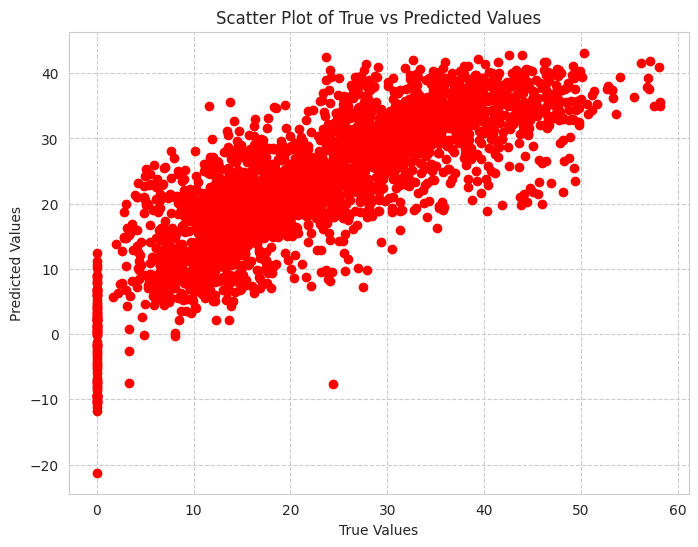

In [ ]:
#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test_pred, color='red')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of True vs Predicted Values")
plt.show()

## Evaluation Metrics

In [ ]:
# create train and test result dictionaries
train_result={}
test_result= {}

def evaluation_metrics(y_true, y_pred, model=None, train=True):

  MSE  = round(mean_squared_error(y_true, y_pred), 2)
  print("MSE :" , MSE)
  RMSE = round(np.sqrt(MSE),2)
  print("RMSE :" ,RMSE)
  MAE= round(mean_absolute_error(y_true, y_pred),2)
  print("MAE :",MAE)
  r2 = round(r2_score(y_true, y_pred),2)
  print("R2 :" ,r2)
  adj_r2 = round(1-(1-r2_score(y_true, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2)
  print("Adjusted R2 :",adj_r2)

  # appending result into dictionary
  if train:
    train_result[model]= [MSE,RMSE,MAE,r2,adj_r2]
  else:
    test_result[model]= [MSE,RMSE,MAE,r2,adj_r2]

In [ ]:
# Train data evaluation metrics
evaluation_metrics(Y_train, Y_train_pred, model='Linear',train=True)

MSE : 53.81
RMSE : 7.34
MAE : 5.64
R2 : 0.65
Adjusted R2 : 0.65


In [ ]:
# Test data evaluation metrics
evaluation_metrics(Y_test, Y_test_pred, model='Linear',train=False)

MSE : 53.74
RMSE : 7.33
MAE : 5.66
R2 : 0.65
Adjusted R2 : 0.65


Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).



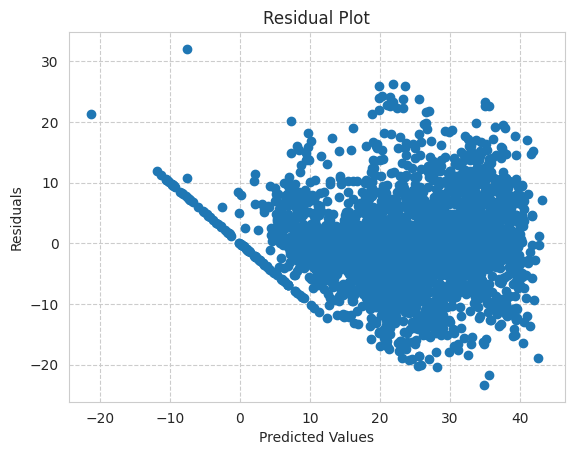

In [ ]:
#Heteroscadacity - Residual plot
plt.scatter((Y_test_pred),(Y_test)-(Y_test_pred))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Lasso Regression and Hyperparameter Tunning

In [ ]:
#creating instance of Lasso algorithm
lasso = Lasso()

# Cross validation
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]})

In [ ]:
print("The best fit alpha value :" ,lasso_regressor.best_params_)

The best fit alpha value : {'alpha': 0.0001}


In [ ]:
# predictions on train and test dataset
train_pred_lasso = lasso_regressor.predict(X_train)
test_pred_lasso= lasso_regressor.predict(X_test)

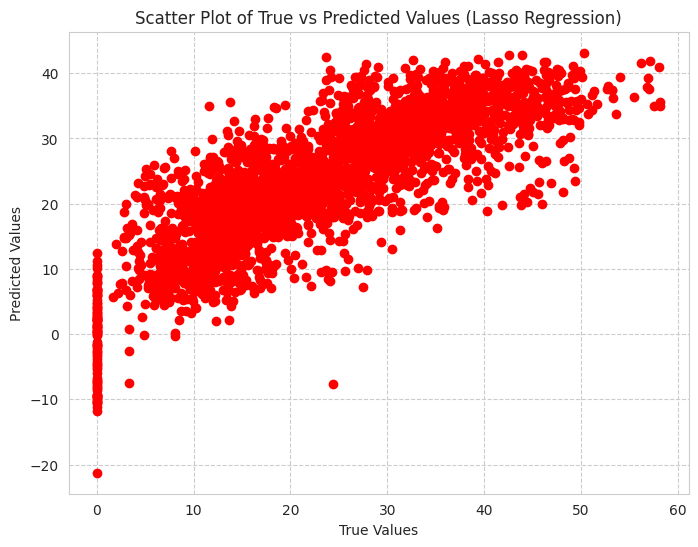

In [ ]:
#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, test_pred_lasso, color='red')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of True vs Predicted Values (Lasso Regression)")
plt.show()

## Evaluation Metrics

In [ ]:
# Train data evaluation metrics
evaluation_metrics(Y_train, train_pred_lasso, 'Lasso', train=True)

MSE : 53.81
RMSE : 7.34
MAE : 5.64
R2 : 0.65
Adjusted R2 : 0.65


In [ ]:
# Test data evaluation metrics
evaluation_metrics(Y_test, test_pred_lasso, 'Lasso', train=False)

MSE : 53.74
RMSE : 7.33
MAE : 5.66
R2 : 0.65
Adjusted R2 : 0.65


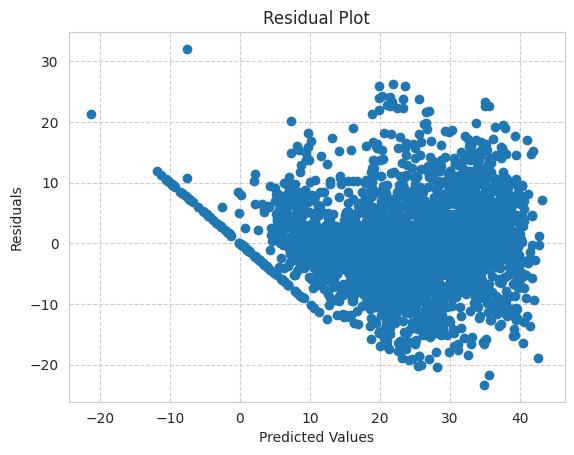

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((test_pred_lasso),(Y_test)-(test_pred_lasso))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Ridge Regression and Hyperparameter Tunning

In [ ]:
#creating instance of Ridge algorithm
ridge = Ridge()

# cross validation
parameters_ridge = {'alpha': [1e-10,1e-5,1e-4,1e-3,1e-2,0.5,1,1.5,5,10,20,30,35,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters_ridge, cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-05, 0.0001, 0.001, 0.01, 0.5, 1,
                                   1.5, 5, 10, 20, 30, 35, 40, 45, 50, 55, 60,
                                   100]})

In [ ]:
print("The best fit alpha value :" ,ridge_regressor.best_params_)

The best fit alpha value : {'alpha': 1e-10}


In [ ]:
# predictions on train and test dataset
train_ridge_pred = ridge_regressor.predict(X_train)
test_ridge_pred = ridge_regressor.predict(X_test)

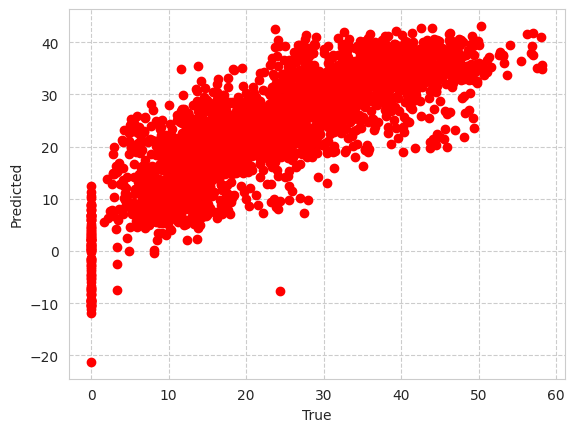

In [ ]:
#scatter plot
plt.scatter(Y_test ,test_ridge_pred  , color = 'r')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## Evaluation Metrics

In [ ]:
# Train data evaluation metrics
evaluation_metrics(Y_train, train_ridge_pred, 'Ridge', train=True)

MSE : 53.81
RMSE : 7.34
MAE : 5.64
R2 : 0.65
Adjusted R2 : 0.65


In [ ]:
# Test data evaluation metrics
evaluation_metrics(Y_test, test_ridge_pred, 'Ridge', train=False)

MSE : 53.74
RMSE : 7.33
MAE : 5.66
R2 : 0.65
Adjusted R2 : 0.65


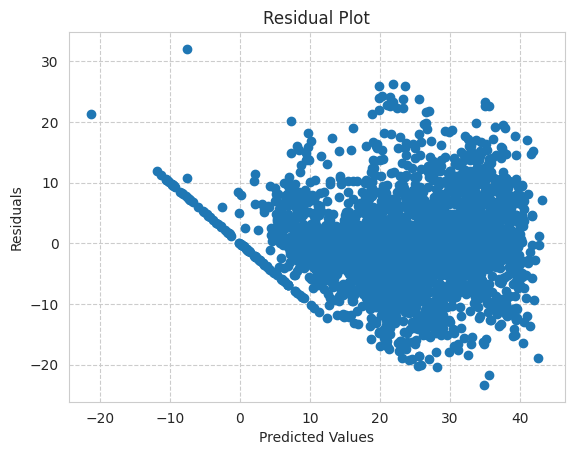

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((test_ridge_pred),(Y_test)-(test_ridge_pred))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## RandomForrest Regressor and Hyperparameter Tunning

In [ ]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# hyperparameter grid
param_dict_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 6, 7],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [40, 50]
  }

In [ ]:
# create regressor object
rf_model= RandomForestRegressor()

# fitting gridsearch
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict_rf,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
# best parameters
rf_grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 200}

In [ ]:
# optimal model
rf_optimal_model= rf_grid.best_estimator_

In [ ]:
# Model score
rf_optimal_model.score(X_train,Y_train)

0.8569177435683211

In [ ]:
# Making predictions on train and test data
train_pred_rf= rf_optimal_model.predict(X_train)
test_pred_rf= rf_optimal_model.predict(X_test)

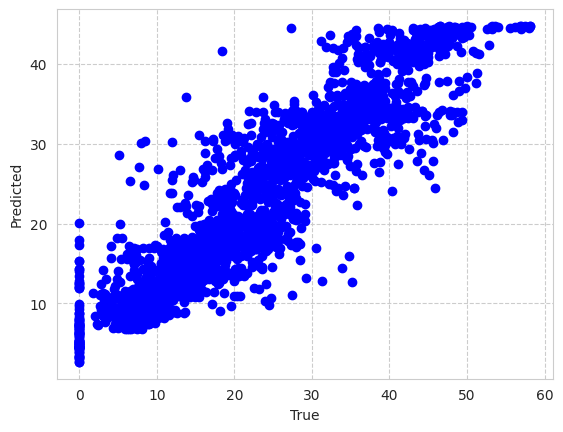

In [ ]:
#scatter plot

plt.scatter(Y_test ,test_pred_rf  , color = 'b')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## Evaluation Metrics

In [ ]:
# Train data Evaluation metrics
evaluation_metrics(Y_train, train_pred_rf, 'Random Forest', train=True)

MSE : 22.26
RMSE : 4.72
MAE : 3.4
R2 : 0.86
Adjusted R2 : 0.86


In [ ]:
# Test data Evaluation metrics
evaluation_metrics(Y_test, test_pred_rf, 'Random Forest', train=False)

MSE : 25.18
RMSE : 5.02
MAE : 3.62
R2 : 0.84
Adjusted R2 : 0.84


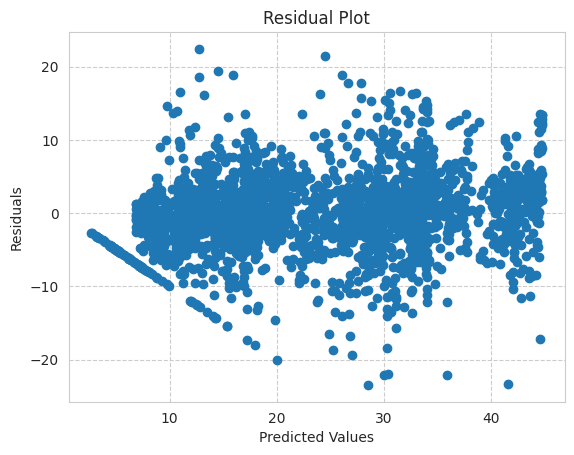

In [ ]:
#Heteroscadacity - Residual plot
plt.scatter((test_pred_rf),(Y_test)-(test_pred_rf))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Feature Importance

In [ ]:
#important features

importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
#rounding off

importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
#sorting values
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1           Temperature(°C)                0.31
0                      Hour                0.26
10          Functioning Day                0.15
2               Humidity(%)                0.12
8                   Seasons                0.07
6              Rainfall(mm)                0.06
5   Solar Radiation (MJ/m2)                0.03
11                  weekend                0.01
3          Wind speed (m/s)                0.00
4          Visibility (10m)                0.00
7             Snowfall (cm)                0.00
9                   Holiday                0.00

In [ ]:

#FIT THE MODEL
rf_optimal_model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=200)

In [ ]:
#sort
features = X_train.columns
importances = rf_optimal_model.feature_importances_
indices = np.argsort(importances)


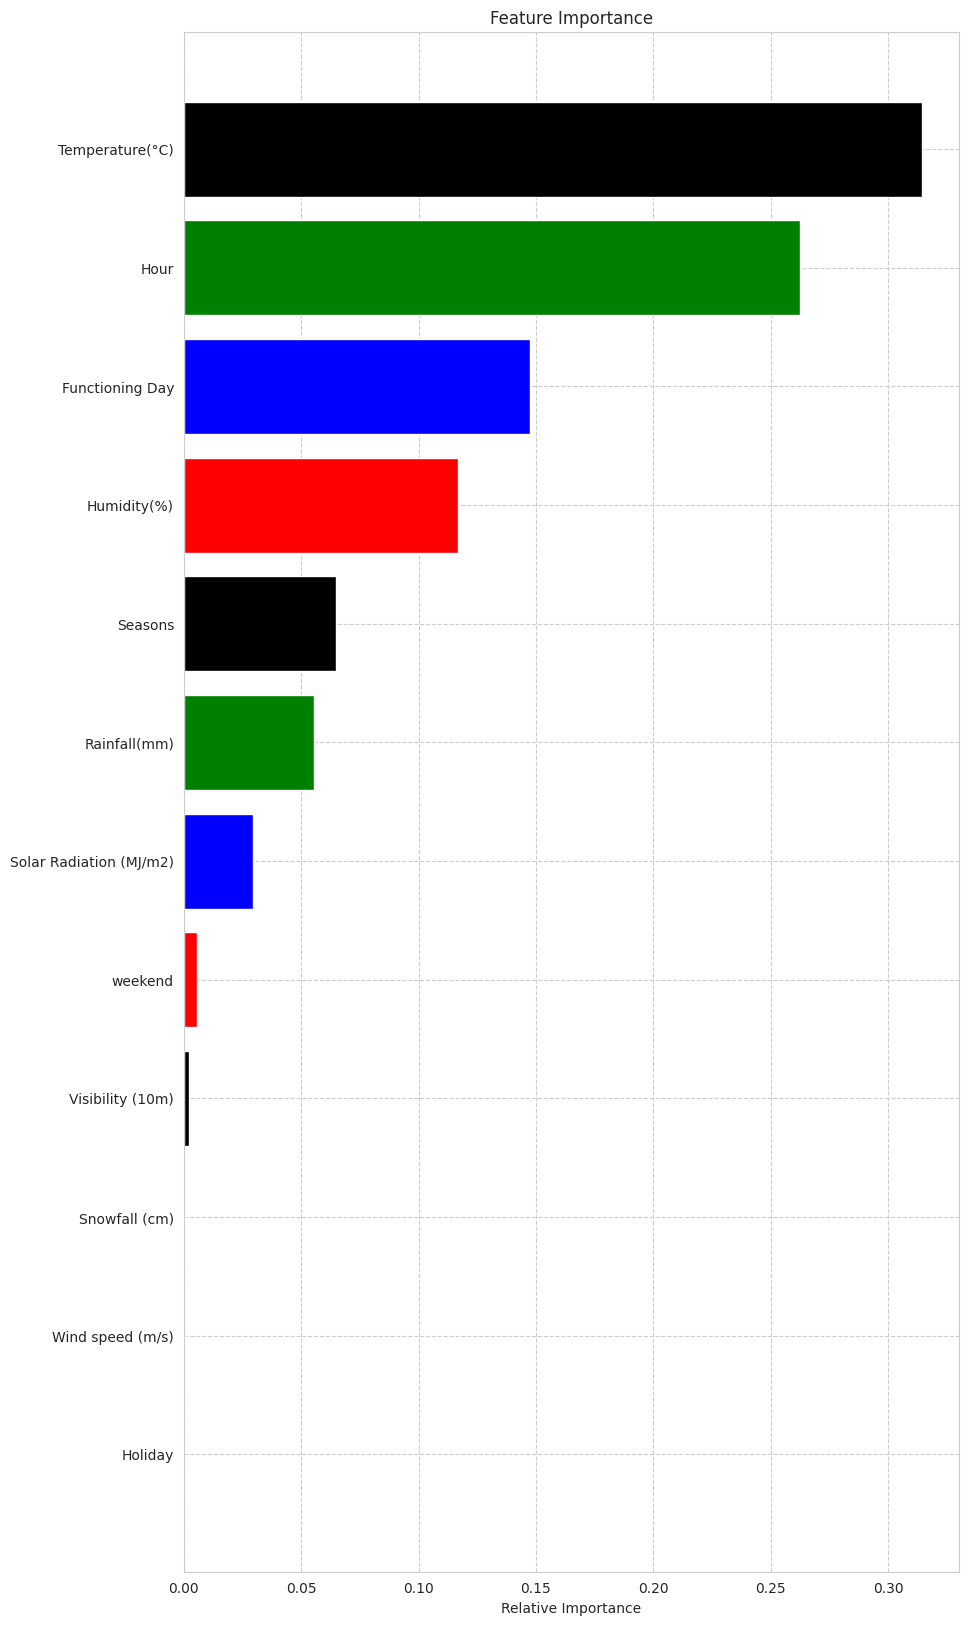

In [ ]:

#Plot the figure
plt.figure(figsize=(10, 20))
plt.title('Feature Importance')
colors = ['red', 'blue', 'green', 'black']
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

* Temprature and Hour have the major importance out of all the Features and they have lot of influence on shuffling Rented Bike Counts

## Gradient Boosting Regressor and Hyperparameter Tunning

In [ ]:
#importing packages
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Hyperparameter Grid
gb_params = {'n_estimators' : [50, 100, 200],
              'max_depth' : [5, 6, 7],
              'min_samples_split' : [50, 80],
              'min_samples_leaf' : [40, 50]}

In [ ]:
# Create an instance of the  GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = gb_params ,
                       cv = 3, verbose=2, scoring='neg_mean_squared_error')

gb_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   1.8s
[CV] END max_depth=5, m

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 6, 7], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# best parameters
gb_grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 40,
 'min_samples_split': 80,
 'n_estimators': 200}

In [ ]:
#best estimator

gb_optimal_model= gb_grid.best_estimator_

In [ ]:
# Model score
gb_optimal_model.score(X_train,Y_train)

0.9683565480073958

In [ ]:
# Making predictions on train and test data
train_pred_gb= gb_optimal_model.predict(X_train)
test_pred_gb= gb_optimal_model.predict(X_test)

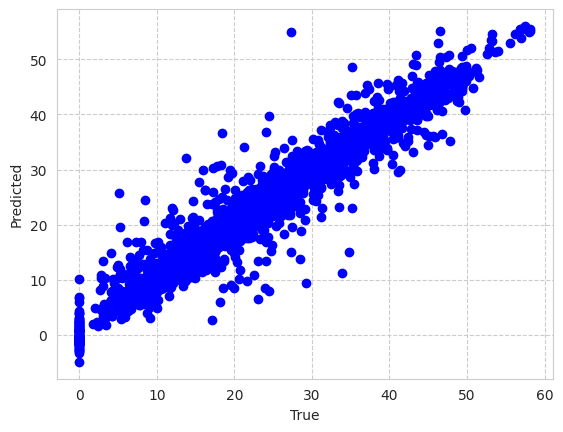

In [ ]:
#scatter plot

plt.scatter(Y_test ,test_pred_gb  , color = 'b')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## Evaluation Metrics

In [ ]:
# Train data evaluation metrics
evaluation_metrics(Y_train,train_pred_gb, 'Gradient Boosting', train=True)

MSE : 4.92
RMSE : 2.22
MAE : 1.49
R2 : 0.97
Adjusted R2 : 0.97


In [ ]:
# Test data evaluation metrics
evaluation_metrics(Y_test,test_pred_gb, 'Gradient Boosting', train=False)

MSE : 10.23
RMSE : 3.2
MAE : 2.1
R2 : 0.93
Adjusted R2 : 0.93


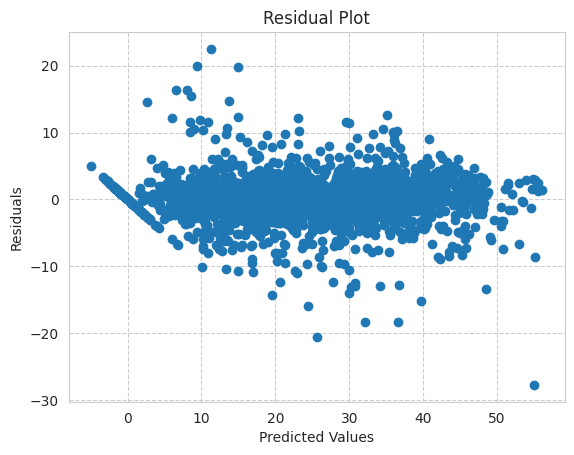

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((test_pred_gb),(Y_test)-(test_pred_gb))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Feature Importance

In [ ]:
#important features

importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance1_df = pd.DataFrame(importance_dict)

In [ ]:
importance1_df['Feature Importance'] = round(importance1_df['Feature Importance'],2)

In [ ]:

importance1_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1           Temperature(°C)                0.28
0                      Hour                0.25
10          Functioning Day                0.15
2               Humidity(%)                0.12
6              Rainfall(mm)                0.06
8                   Seasons                0.06
5   Solar Radiation (MJ/m2)                0.04
11                  weekend                0.02
4          Visibility (10m)                0.01
3          Wind speed (m/s)                0.00
7             Snowfall (cm)                0.00
9                   Holiday                0.00

In [ ]:
#Fitting
gb_optimal_model.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=7, min_samples_leaf=40,
                          min_samples_split=80, n_estimators=200)

In [ ]:
#sorting features
features = X_train.columns
importances = gb_optimal_model.feature_importances_
indices = np.argsort(importances)

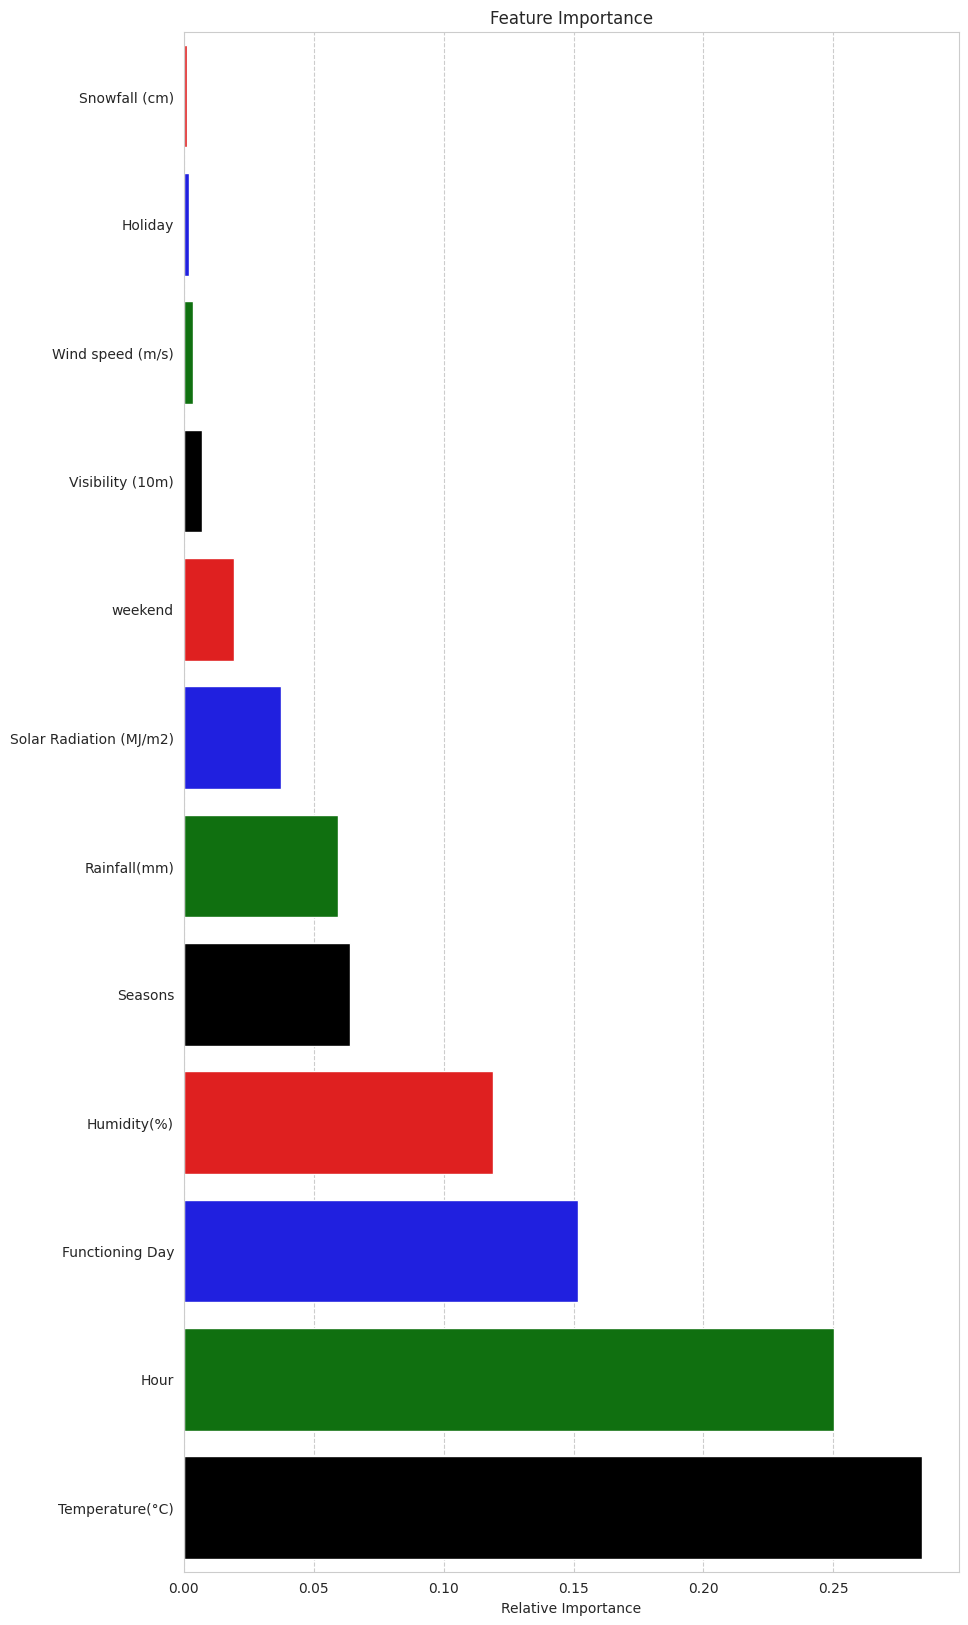

In [ ]:
#Plot the figure
plt.figure(figsize=(10, 20))
sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette=['red', 'blue', 'green', 'black'])
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.show()

## Results

In [ ]:
#training results of evaluation metrics
results_train_df= pd.DataFrame(train_result).T.reset_index()
results_train_df.columns= ['Model', 'MSE', 'RMSE', 'MAE', 'R2 score', 'Adjusted R2']
results_train_df

Model    MSE  RMSE   MAE  R2 score  Adjusted R2
0             Linear  53.81  7.34  5.64      0.65         0.65
1              Lasso  53.81  7.34  5.64      0.65         0.65
2              Ridge  53.81  7.34  5.64      0.65         0.65
3      Random Forest  22.26  4.72  3.40      0.86         0.86
4  Gradient Boosting   4.92  2.22  1.49      0.97         0.97

In [ ]:
#testing results of evaluation metrics
test_results_df= pd.DataFrame(test_result).T.reset_index()
test_results_df.columns= ['Model', 'MSE', 'RMSE', 'MAE', 'R2 score', 'Adjusted R2']
test_results_df

Model    MSE  RMSE   MAE  R2 score  Adjusted R2
0             Linear  53.74  7.33  5.66      0.65         0.65
1              Lasso  53.74  7.33  5.66      0.65         0.65
2              Ridge  53.74  7.33  5.66      0.65         0.65
3      Random Forest  25.18  5.02  3.62      0.84         0.84
4  Gradient Boosting  10.23  3.20  2.10      0.93         0.93

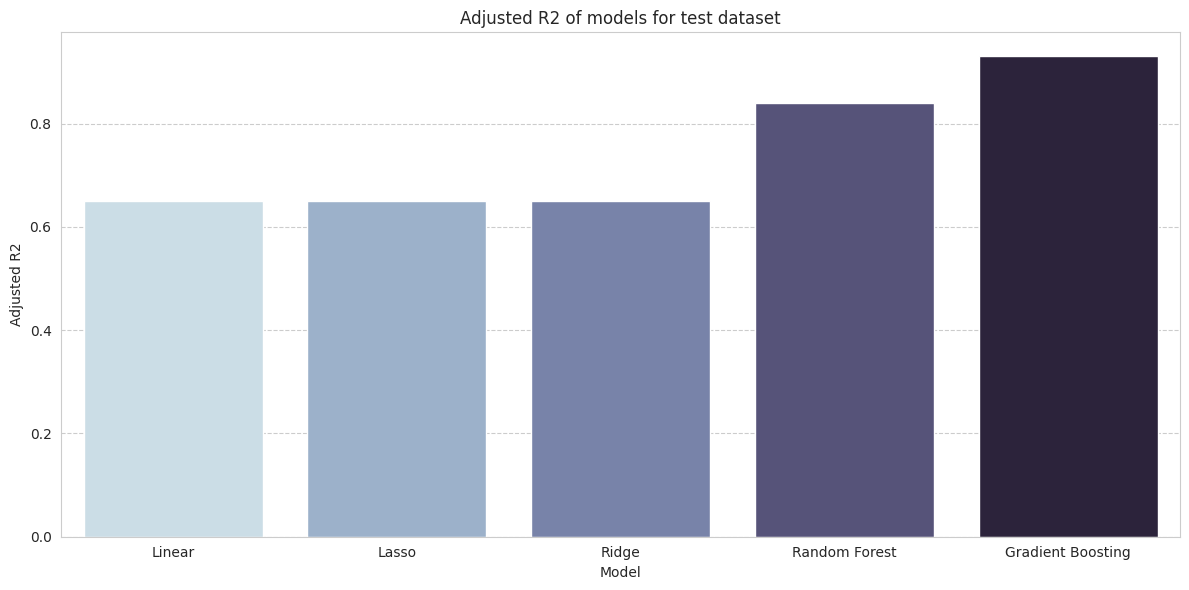

In [ ]:
# plot Adjusted R2 of models for test dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Adjusted R2', data=test_results_df, palette="ch:s=.25,rot=-.25")
plt.title("Adjusted R2 of models for test dataset")
plt.xlabel("Model")
plt.ylabel("Adjusted R2")

plt.tight_layout()
plt.show()

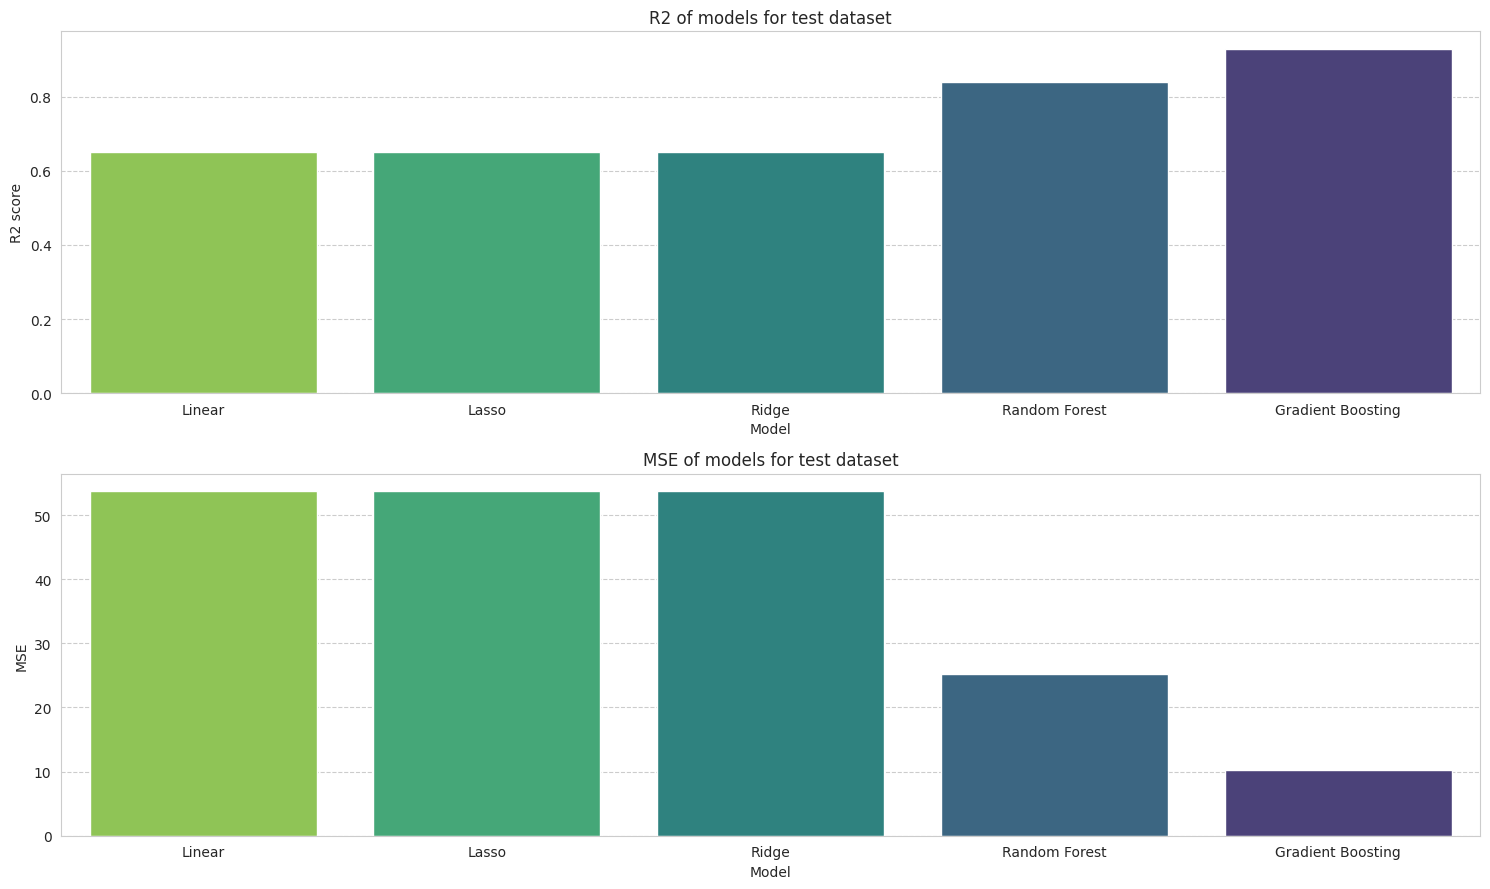

In [ ]:
# plot R2 and MSE of models for test dataset
fig, ax = plt.subplots(2,figsize=(15,9))
sns.barplot(x='Model',y='R2 score', data=test_results_df, palette="viridis_r", ax= ax[0])
ax[0].set_title("R2 of models for test dataset")

sns.barplot(x='Model',y='MSE', data=test_results_df, palette="viridis_r", ax= ax[1])
ax[1].set_title("MSE of models for test dataset")

plt.tight_layout()
plt.show()

# **Conclusion**

Initially, I performed an exploratory data analysis (EDA) on each feature in our dataset after cleaning the data. I started by analyzing my dependent variable, "Rented Bike count," and then I made the necessary modifications.Subsequently, I examined both category and numerical independent variables. For these variables, I have performed both bivariate and monovariate analysis. In addition, I looked at the numerical variables and determined how they related to the dependent variable and how they were correlated. I also used VIF to address the multicollinearity issue. Additionally, I added an Additional Column and used LableEncoding on a number variable.

Linear Regression, Lasso, Ridge, Random Forest, and Gradient Boosting were the five machine learning methods I used. In order to improve our models' performance, I also adjusted the hyperparameters.

**Some facts based on analysis**:

* Boosting with gradients The regressor model appears to be a viable solution to this issue because it yields positive results when looking at R-squared, Adjusted R2, and MSE and RMSE.

* Summer is the busiest time of year to rent bikes, with winter seeing the lowest number of rentals.

* Clear days see a higher demand for bicycles than do snowy or wet days.

* There is greater demand for bikes in the 22–25 (°C) temperature range.

###**That's it!Thankyou**